<h1 style = "color : Brown"> House Price Prediction Assignment</h1>

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 

<h2 style = "color : Brown"> Problem Statement</h2>

The company wants to know:-
<ul>
    <li>Which variables are significant in predicting the price of a house, and</li>
    <li>How well those variables describe the price of a house.</li>
</ul>

<h2 style = "color : Brown"> Business Goal</h2>

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

<h2 style = "color : Brown"> Importing Necessary Libraries</h2>

In [1]:
#import the necessary libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import os
import warnings

In [2]:
#hide warnings
warnings.filterwarnings('ignore')
# customizing some aspects of panda behavior
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

<h2 style = "color : Brown"> Read the dataset</h2>
We will read the data using read_csv() function of pandas library

In [3]:
#read the csv file
df_house_price_prediction=pd.read_csv('train.csv')

<h2>Visualizing the Data</h2>

In [4]:
#Looking at the data
df_house_price_prediction.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0   1          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1          Gd             8        Typ           0         NaN     Attchd       2003.0          RFn           2         548         TA         TA          Y           0           61              0          0            0         0    NaN   NaN         NaN        0       2    2008       WD        Normal     208500
1   2          20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1          TA             6        Typ           1          TA     Attchd       1976.0          RFn           2         460         TA         TA          Y         298            0              0          0            0         0    NaN   NaN         NaN        0       5    2007       WD        Normal     181500
2   3          60       RL         68.0    11250   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1          Gd             6        Typ           1          TA     Attchd       2001.0          RFn           2         608         TA         TA          Y           0           42              0          0            0         0    NaN   NaN         NaN        0       9    2008       WD        Normal     223500
3   4          70       RL         60.0     9550   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756   

In [5]:
#Getting shape of data
df_house_price_prediction.shape

(1460, 81)

In [6]:
#summary of the housing data
df_house_price_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
#Description of data
df_house_price_prediction.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold       YrSold      SalePrice
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000
mean    730.500000    56.897260    70.049958   10516.828082     6.099315     5.575342  1971.267808   1984.865753   103.685262   443.639726    46.549315   567.240411  1057.429452  1162.626712   346.992466      5.844521  1515.463699      0.425342      0.057534     1.565068     0.382877      2.866438      1.046575      6.517808     0.613014  1978.506164     1.767123   472.980137    94.244521    46.660274      21.954110     3.409589    15.060959     2.758904     43.489041     6.321918  2007.815753  180921.195890
std     421.610009    42.300571    24.284752    9981.264932     1.382997     1.112799    30.202904     20.645407   181.066207   456.098091   161.319273   441.866955   438.705324   386.587738   436.528436     48.623081   525.480383      0.518911      0.238753     0.550916     0.502885      0.815778      0.220338      1.625393     0.644666    24.689725     0.747315   213.804841   125.338794    66.256028      61.119149    29.317331    55.757415    40.177307    496.123024     2.703626     1.328095   79442.502883
min       1.000000    20.000000    21.000000    1300.000000     1.000000     1.000000  1872.000000   1950.000000     0.000000     0.000000     0.000000     0.000000     0.000000   334.000000     0.000000      0.000000   334.000000      0.000000      0.000000     0.000000     0.000000      0.000000      0.000000      2.000000     0.000000  1900.000000     0.000000     0.000000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     1.000000  2006.000000   34900.000000
25%     365.750000    20.000000    59.000000    7553.500000     5.000000     5.000000  1954.000000   1967.000000     0.000000     0.000000     0.000000   223.000000   795.750000   882.000000     0.000000      0.000000  1129.500000      0.000000      0.000000     1.000000     0.000000      2.000000      1.000000      5.000000     0.000000  1961.000000     1.000000   334.500000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     5.000000  2007.000000  129975.000000
50%     730.500000    50.000000    69.000000    9478.500000     6.000000     5.000000  1973.000000   1994.000000     0.000000   383.500000     0.000000   477.500000   991.500000  1087.000000     0.000000      0.000000  1464.000000      0.000000      0.000000     2.000000     0.000000      3.000000      1.000000      6.000000     1.000000  1980.000000     2.000000   480.000000     0.000000    25.000000       0.000000     0.000000     0.000000     0.000000      0.000000     6.000000  2008.000000  163000.000000
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000     6.000000  2000.000000   2004.000000   166.000000   712.250000     0.000000   808.000000  1298.250000  1391.250000   728.000000      0.000000  1776.750000      1.000000      0.000000     2.000000     1.000000      3.000000      1.000000      7.000000     1.000000  2002.000000     2.000000   576.000000   168.000000    68.000000       0.00000

<h2>Handling Null values and Droping all the Unwanted columns</h2>

In [8]:
#handling the null values
#The null value sum
df_house_price_prediction.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [9]:
null_percent = pd.DataFrame(round(df_house_price_prediction.isnull().sum()/len(df_house_price_prediction.index)*100,2).sort_values(ascending=False),columns=["Null %"])
null_percent.index.name = 'Features'
null_percent.head()

Null %
Features           
PoolQC        99.52
MiscFeature   96.30
Alley         93.77
Fence         80.75
FireplaceQu   47.26

In [10]:
# dataframe with having features with the null values
df_house_price_prediction_null = null_percent[null_percent["Null %"] > 0]
df_house_price_prediction_null

Null %
Features            
PoolQC         99.52
MiscFeature    96.30
Alley          93.77
Fence          80.75
FireplaceQu    47.26
LotFrontage    17.74
GarageYrBlt     5.55
GarageCond      5.55
GarageType      5.55
GarageFinish    5.55
GarageQual      5.55
BsmtFinType2    2.60
BsmtExposure    2.60
BsmtQual        2.53
BsmtCond        2.53
BsmtFinType1    2.53
MasVnrArea      0.55
MasVnrType      0.55
Electrical      0.07

<h2>Dropped columns</h2>
<p>we will drop the </p>
 <p>   'PoolQC',</p>
 <p>   'MiscFeature',</p>
 <p>   'Alley',</p>
<p>    'Fence',</p>
<p>    'FireplaceQu'</p>
<p>    column becuase there are so many missing values and id column is not required
</p>

In [11]:
df_house_price_prediction = df_house_price_prediction.drop(['PoolQC','MiscFeature','Id','Alley','Fence','FireplaceQu'],axis=1)

In [12]:
null_percent = pd.DataFrame(round(df_house_price_prediction.isnull().sum()/len(df_house_price_prediction.index)*100,2).sort_values(ascending=False),columns=["Null %"])
null_percent.index.name = 'Features'
df_house_price_prediction_null = null_percent[null_percent["Null %"] > 0]
df_house_price_prediction_null

Null %
Features            
LotFrontage    17.74
GarageType      5.55
GarageYrBlt     5.55
GarageFinish    5.55
GarageQual      5.55
GarageCond      5.55
BsmtFinType2    2.60
BsmtExposure    2.60
BsmtQual        2.53
BsmtCond        2.53
BsmtFinType1    2.53
MasVnrArea      0.55
MasVnrType      0.55
Electrical      0.07

In [13]:
#seeing all the remaining columns
df_house_price_prediction.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
 

In [14]:
#checking all the Categorical columns
df_house_price_prediction.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'], dtype='object')

In [15]:
# Checking all the Numeric columns
df_house_price_prediction.select_dtypes(exclude='object').columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'], dtype='object')

In [16]:
# let's look at the columns with the highest percentage of missing values
print('The unique values in the columns with highest number if NAN or missing values')
list_of_columns = ["LotFrontage", "GarageCond", "GarageType", "GarageYrBlt", "GarageFinish", "GarageQual", "BsmtExposure", "BsmtFinType2", "BsmtFinType1", "BsmtCond", "BsmtQual", "MasVnrArea", "MasVnrType", "Electrical"]
for x in list_of_columns:
    print('\n')
    print(x, ' Column: ',df_house_price_prediction[x].value_counts())



The unique values in the columns with highest number if NAN or missing values


LotFrontage  Column:  60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
64.0      19
24.0      19
73.0      18
55.0      17
63.0      17
79.0      17
72.0      17
100.0     16
66.0      15
74.0      15
51.0      15
52.0      14
59.0      13
82.0      12
71.0      12
67.0      12
43.0      12
40.0      12
57.0      12
76.0      11
69.0      11
92.0      10
34.0      10
53.0      10
86.0      10
88.0      10
84.0       9
35.0       9
62.0       9
44.0       9
77.0       9
93.0       8
98.0       8
96.0       8
61.0       8
95.0       7
58.0       7
120.0      7
107.0      7
94.0       6
81.0       6
36.0       6
30.0       6
48.0       6
91.0       6
41.0       6
54.0       6
89.0       6
110.0      6
105.0      6
32.0       5
47.0       5
87.0       5
56.0       5
37.0       5
83.0       5
102.0      4
42.0       4
4

In [17]:
# for the LotFrontage and GarageYrBlt columns, we impute missing values using the median because the feature contains outliers
df_house_price_prediction['LotFrontage'] = df_house_price_prediction['LotFrontage'].fillna(df_house_price_prediction['LotFrontage'].median())

df_house_price_prediction['GarageYrBlt'] = df_house_price_prediction['GarageYrBlt'].fillna(df_house_price_prediction['GarageYrBlt'].median())

# for the "below columns" we will impute the null values with 'mode'
for col in ('GarageCond', 'GarageType', 'GarageFinish','GarageQual'):
    
    df_house_price_prediction[col] = df_house_price_prediction[col].fillna(df_house_price_prediction[col].mode()[0])
    
# for the "Bsmt" columns we will impute the null values with 'mode'
for col in ('BsmtExposure', 'BsmtFinType2', 'BsmtFinType1','BsmtCond','BsmtQual'):
    
    df_house_price_prediction[col] = df_house_price_prediction[col].fillna(df_house_price_prediction[col].mode()[0])
    
# for the columns we will impute the null values with 'mode'

for col in ('MasVnrArea', 'MasVnrType', 'Electrical'):
    
    df_house_price_prediction[col] = df_house_price_prediction[col].fillna(df_house_price_prediction[col].mode()[0])


In [18]:
null_percent = pd.DataFrame(round(df_house_price_prediction.isnull().sum()/len(df_house_price_prediction.index)*100,2).sort_values(ascending=False),columns=["Null %"])
null_percent.index.name = 'Features'
df_house_price_prediction_null = null_percent[null_percent["Null %"] > 0]
df_house_price_prediction_null

Empty DataFrame
Columns: [Null %]
Index: []

In [19]:
# checking for the presence of any more null values
df_house_price_prediction.isnull().values.any()

False

In [20]:
# check Null value
df_house_price_prediction.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [21]:
# Check the shape
df_house_price_prediction.shape

(1460, 75)

In [22]:
df_house_price_prediction.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold       YrSold      SalePrice
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000
mean     56.897260    69.863699   10516.828082     6.099315     5.575342  1971.267808   1984.865753   103.117123   443.639726    46.549315   567.240411  1057.429452  1162.626712   346.992466      5.844521  1515.463699      0.425342      0.057534     1.565068     0.382877      2.866438      1.046575      6.517808     0.613014  1978.589041     1.767123   472.980137    94.244521    46.660274      21.954110     3.409589    15.060959     2.758904     43.489041     6.321918  2007.815753  180921.195890
std      42.300571    22.027677    9981.264932     1.382997     1.112799    30.202904     20.645407   180.731373   456.098091   161.319273   441.866955   438.705324   386.587738   436.528436     48.623081   525.480383      0.518911      0.238753     0.550916     0.502885      0.815778      0.220338      1.625393     0.644666    23.997022     0.747315   213.804841   125.338794    66.256028      61.119149    29.317331    55.757415    40.177307    496.123024     2.703626     1.328095   79442.502883
min      20.000000    21.000000    1300.000000     1.000000     1.000000  1872.000000   1950.000000     0.000000     0.000000     0.000000     0.000000     0.000000   334.000000     0.000000      0.000000   334.000000      0.000000      0.000000     0.000000     0.000000      0.000000      0.000000      2.000000     0.000000  1900.000000     0.000000     0.000000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     1.000000  2006.000000   34900.000000
25%      20.000000    60.000000    7553.500000     5.000000     5.000000  1954.000000   1967.000000     0.000000     0.000000     0.000000   223.000000   795.750000   882.000000     0.000000      0.000000  1129.500000      0.000000      0.000000     1.000000     0.000000      2.000000      1.000000      5.000000     0.000000  1962.000000     1.000000   334.500000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     5.000000  2007.000000  129975.000000
50%      50.000000    69.000000    9478.500000     6.000000     5.000000  1973.000000   1994.000000     0.000000   383.500000     0.000000   477.500000   991.500000  1087.000000     0.000000      0.000000  1464.000000      0.000000      0.000000     2.000000     0.000000      3.000000      1.000000      6.000000     1.000000  1980.000000     2.000000   480.000000     0.000000    25.000000       0.000000     0.000000     0.000000     0.000000      0.000000     6.000000  2008.000000  163000.000000
75%      70.000000    79.000000   11601.500000     7.000000     6.000000  2000.000000   2004.000000   164.250000   712.250000     0.000000   808.000000  1298.250000  1391.250000   728.000000      0.000000  1776.750000      1.000000      0.000000     2.000000     1.000000      3.000000      1.000000      7.000000     1.000000  2001.000000     2.000000   576.000000   168.000000    68.000000       0.000000     0.000000     0.000000     0.000000      0.000000     8.000000  2009.000000  214000.000000


In [23]:
# checking 'PoolArea', 'MiscVal', '3SsnPorch' columns value count
print(df_house_price_prediction['PoolArea'].value_counts())
print(df_house_price_prediction['MiscVal'].value_counts())
print(df_house_price_prediction['3SsnPorch'].value_counts())

0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64
0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
15500       1
800         1
350         1
3500        1
1300        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: MiscVal, dtype: int64
0      1436
168       3
144       2
180       2
216       2
290       1
153       1
96        1
23        1
162       1
182       1
196       1
320       1
245       1
238       1
508       1
140       1
130       1
407       1
304       1
Name: 3SsnPorch, dtype: int64


In [24]:
# we drop these columns because they are dominated by a single value and add no additional information to our model
df_house_price_prediction = df_house_price_prediction.drop(['PoolArea','MiscVal','3SsnPorch'],axis=1)

In [25]:
df_house_price_prediction.shape

(1460, 72)

In [26]:
df_house_price_prediction.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch       MoSold       YrSold      SalePrice
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000    1460.000000
mean     56.897260    69.863699   10516.828082     6.099315     5.575342  1971.267808   1984.865753   103.117123   443.639726    46.549315   567.240411  1057.429452  1162.626712   346.992466      5.844521  1515.463699      0.425342      0.057534     1.565068     0.382877      2.866438      1.046575      6.517808     0.613014  1978.589041     1.767123   472.980137    94.244521    46.660274      21.954110    15.060959     6.321918  2007.815753  180921.195890
std      42.300571    22.027677    9981.264932     1.382997     1.112799    30.202904     20.645407   180.731373   456.098091   161.319273   441.866955   438.705324   386.587738   436.528436     48.623081   525.480383      0.518911      0.238753     0.550916     0.502885      0.815778      0.220338      1.625393     0.644666    23.997022     0.747315   213.804841   125.338794    66.256028      61.119149    55.757415     2.703626     1.328095   79442.502883
min      20.000000    21.000000    1300.000000     1.000000     1.000000  1872.000000   1950.000000     0.000000     0.000000     0.000000     0.000000     0.000000   334.000000     0.000000      0.000000   334.000000      0.000000      0.000000     0.000000     0.000000      0.000000      0.000000      2.000000     0.000000  1900.000000     0.000000     0.000000     0.000000     0.000000       0.000000     0.000000     1.000000  2006.000000   34900.000000
25%      20.000000    60.000000    7553.500000     5.000000     5.000000  1954.000000   1967.000000     0.000000     0.000000     0.000000   223.000000   795.750000   882.000000     0.000000      0.000000  1129.500000      0.000000      0.000000     1.000000     0.000000      2.000000      1.000000      5.000000     0.000000  1962.000000     1.000000   334.500000     0.000000     0.000000       0.000000     0.000000     5.000000  2007.000000  129975.000000
50%      50.000000    69.000000    9478.500000     6.000000     5.000000  1973.000000   1994.000000     0.000000   383.500000     0.000000   477.500000   991.500000  1087.000000     0.000000      0.000000  1464.000000      0.000000      0.000000     2.000000     0.000000      3.000000      1.000000      6.000000     1.000000  1980.000000     2.000000   480.000000     0.000000    25.000000       0.000000     0.000000     6.000000  2008.000000  163000.000000
75%      70.000000    79.000000   11601.500000     7.000000     6.000000  2000.000000   2004.000000   164.250000   712.250000     0.000000   808.000000  1298.250000  1391.250000   728.000000      0.000000  1776.750000      1.000000      0.000000     2.000000     1.000000      3.000000      1.000000      7.000000     1.000000  2001.000000     2.000000   576.000000   168.000000    68.000000       0.000000     0.000000     8.000000  2009.000000  214000.000000
max     190.000000   313.000000  215245.000000    10.000000     9.000000  2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  2336.000000  6110.000000  4692.000000  2065.000000    572.000000  5642.000000      3.000000      2.000000     3.000000     2.000000      8.000000      3.000000     14.000000     3.

<h2>Outliers treatment
</h2>

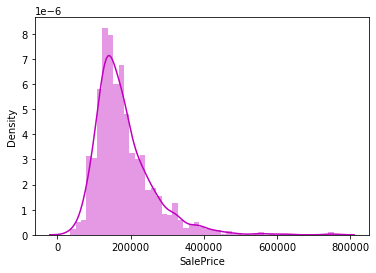

In [27]:
# SalePrice column
plt.figure()
sns.distplot(df_house_price_prediction['SalePrice'],color='m')
plt.show()

In [28]:
# Numeric columns
df_house_price_prediction.select_dtypes(exclude='object').columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold', 'SalePrice'], dtype='object')

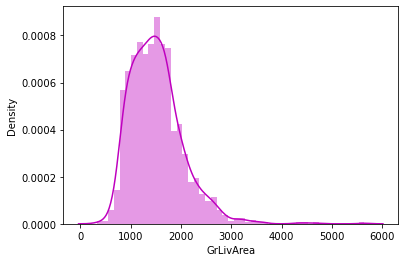

In [29]:
# GrLivArea column
plt.figure()
sns.distplot(df_house_price_prediction['GrLivArea'],color='m')
plt.show()

In [30]:
# we will use IQR to remove the outliers
cols_house_price_prediction = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 
         'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
        '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
        'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
        'EnclosedPorch','ScreenPorch', 'MoSold', 'YrSold', 'SalePrice'] # one or more

Q1_house_price_prediction = df_house_price_prediction[cols_house_price_prediction].quantile(0.05)
Q3_house_price_prediction = df_house_price_prediction[cols_house_price_prediction].quantile(0.95)
IQR_house_price_prediction = Q3_house_price_prediction - Q1_house_price_prediction

df_house_price_prediction = df_house_price_prediction[~((df_house_price_prediction[cols_house_price_prediction] < (Q1_house_price_prediction - 1.5 * IQR_house_price_prediction)) |(df_house_price_prediction[cols_house_price_prediction] > (Q3_house_price_prediction + 1.5 * IQR_house_price_prediction))).any(axis=1)]

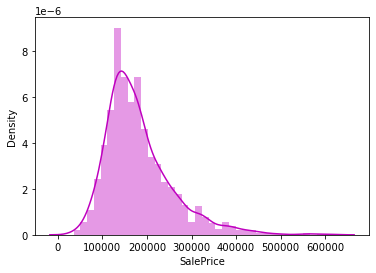

In [31]:
# SalePrice column
plt.figure()
sns.distplot(df_house_price_prediction['SalePrice'],color='m')
plt.show()

In [32]:
# We have now removed some outliers, lets check the infomation
df_house_price_prediction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1333 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1333 non-null   int64  
 1   MSZoning       1333 non-null   object 
 2   LotFrontage    1333 non-null   float64
 3   LotArea        1333 non-null   int64  
 4   Street         1333 non-null   object 
 5   LotShape       1333 non-null   object 
 6   LandContour    1333 non-null   object 
 7   Utilities      1333 non-null   object 
 8   LotConfig      1333 non-null   object 
 9   LandSlope      1333 non-null   object 
 10  Neighborhood   1333 non-null   object 
 11  Condition1     1333 non-null   object 
 12  Condition2     1333 non-null   object 
 13  BldgType       1333 non-null   object 
 14  HouseStyle     1333 non-null   object 
 15  OverallQual    1333 non-null   int64  
 16  OverallCond    1333 non-null   int64  
 17  YearBuilt      1333 non-null   int64  
 18  YearRemo

<h2>Plotting the Data</h2>

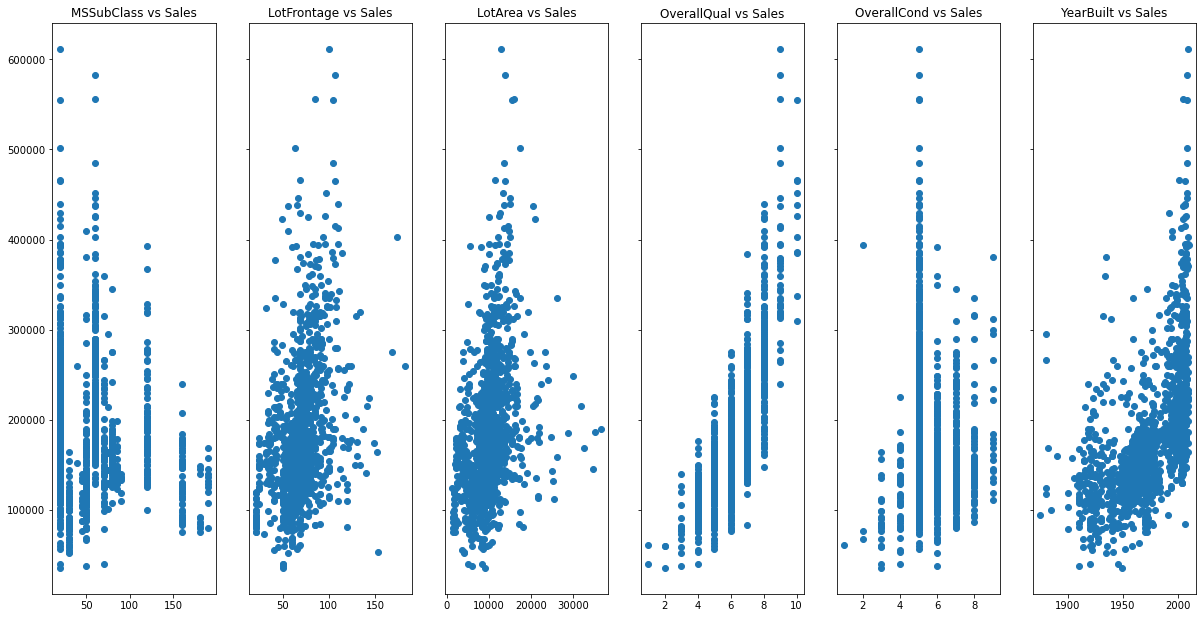

In [33]:
fig, ax = plt.subplots(ncols=6, sharey=True)
list_of_columns_1 = ["MSSubClass", "LotFrontage", "LotArea", "OverallQual", "OverallCond", "YearBuilt"]
flag_i = 0
for x in list_of_columns_1:
    plot_title = x +' vs Sales'
    column = ax[flag_i].scatter(df_house_price_prediction[x], df_house_price_prediction['SalePrice'])
    column.set_label(x)
    ax[flag_i].set_title(plot_title)
    flag_i = flag_i + 1

fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()

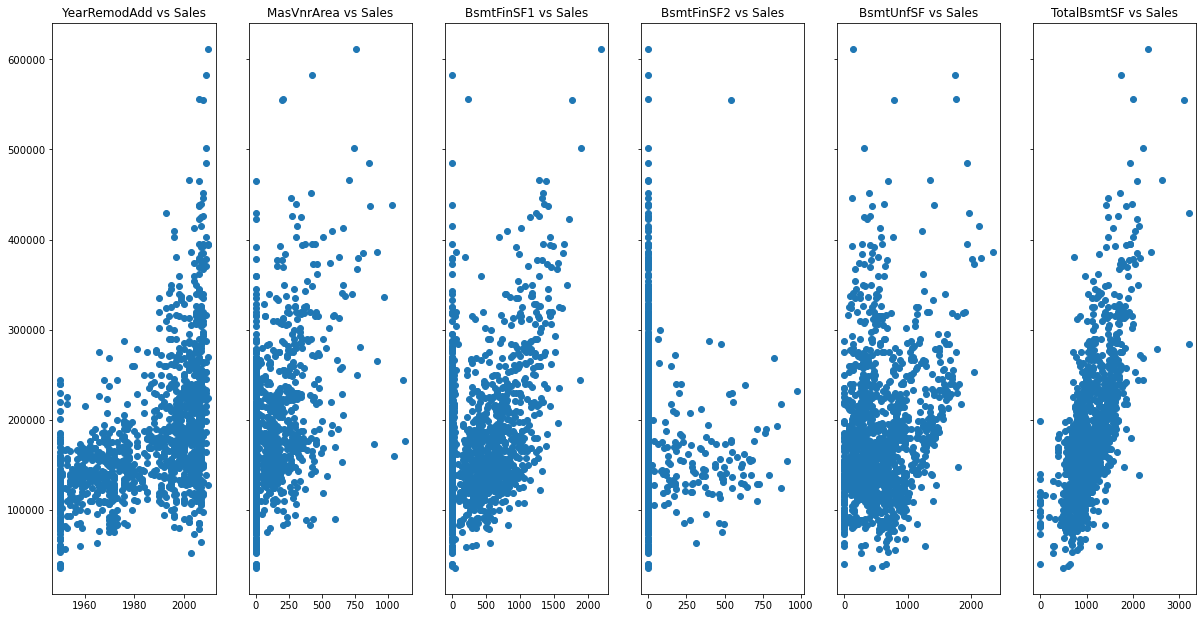

In [34]:
fig, ax = plt.subplots(ncols=6, sharey=True)

list_of_columns_2 = ["YearRemodAdd", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF"]
flag_i = 0
for x in list_of_columns_2:
    plot_title = x +' vs Sales'
    column = ax[flag_i].scatter(df_house_price_prediction[x], df_house_price_prediction['SalePrice'])
    column.set_label(x)
    ax[flag_i].set_title(plot_title)
    flag_i = flag_i + 1

fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()

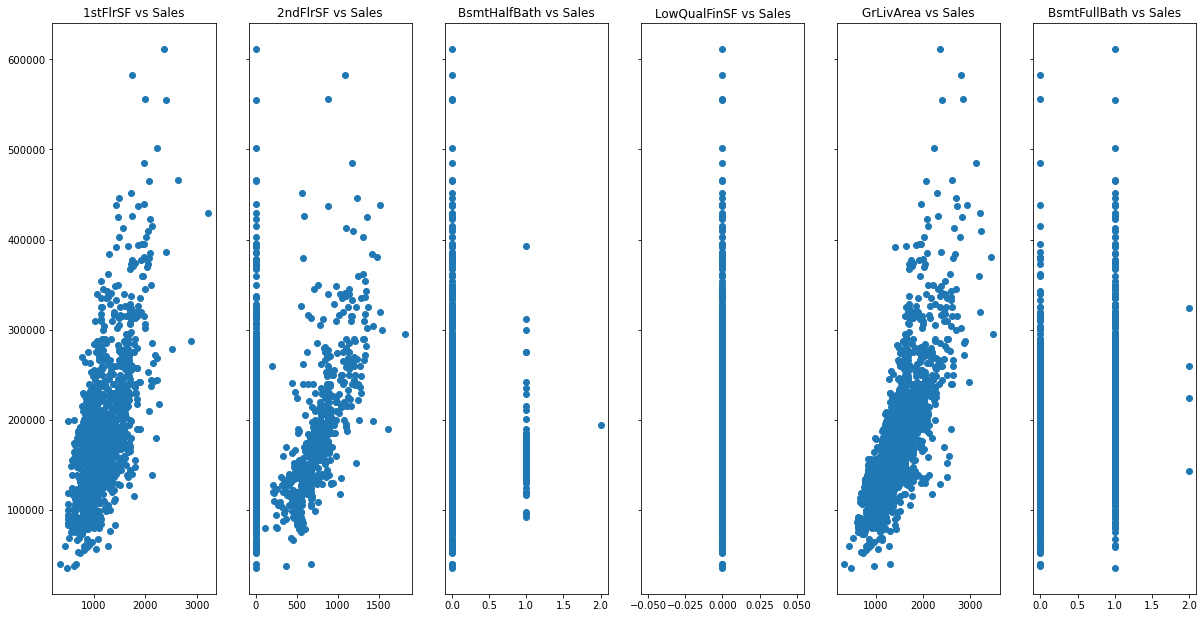

In [35]:
fig, ax = plt.subplots(ncols=6, sharey=True)

list_of_columns_3 = ["1stFlrSF", "2ndFlrSF", "BsmtHalfBath", "LowQualFinSF", "GrLivArea", "BsmtFullBath"]
flag_i = 0
for x in list_of_columns_3:
    plot_title = x +' vs Sales'
    column = ax[flag_i].scatter(df_house_price_prediction[x], df_house_price_prediction['SalePrice'])
    column.set_label(x)
    ax[flag_i].set_title(plot_title)
    flag_i = flag_i + 1

fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()

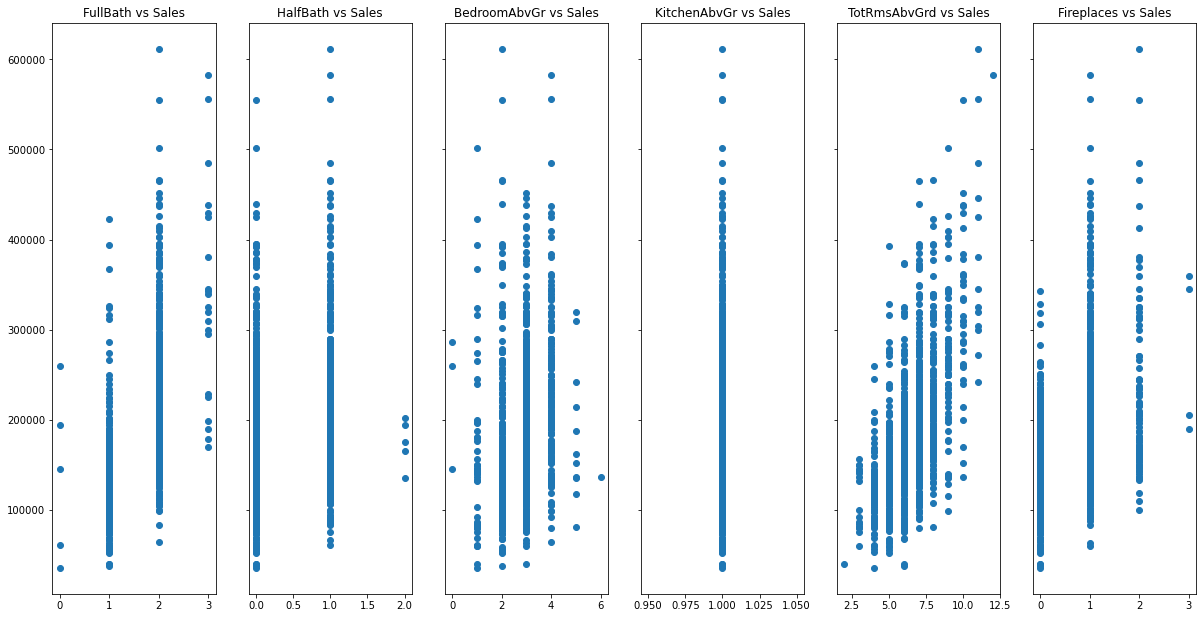

In [36]:
fig, ax = plt.subplots(ncols=6, sharey=True)

list_of_columns_4 = ["FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces"]
flag_i = 0
for x in list_of_columns_4:
    plot_title = x +' vs Sales'
    column = ax[flag_i].scatter(df_house_price_prediction[x], df_house_price_prediction['SalePrice'])
    column.set_label(x)
    ax[flag_i].set_title(plot_title)
    flag_i = flag_i + 1

fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()

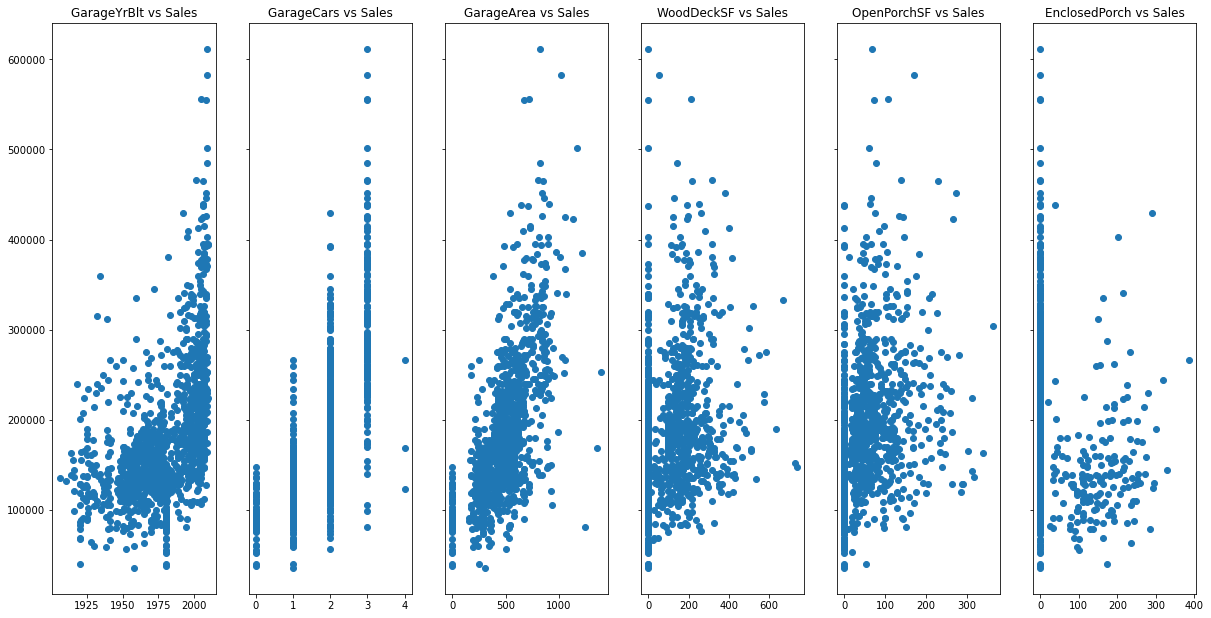

In [37]:
fig, ax = plt.subplots(ncols=6, sharey=True)

list_of_columns_5 = ["GarageYrBlt", "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch"]
flag_i = 0
for x in list_of_columns_5:
    plot_title = x +' vs Sales'
    column = ax[flag_i].scatter(df_house_price_prediction[x], df_house_price_prediction['SalePrice'])
    column.set_label(x)
    ax[flag_i].set_title(plot_title)
    flag_i = flag_i + 1

fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()

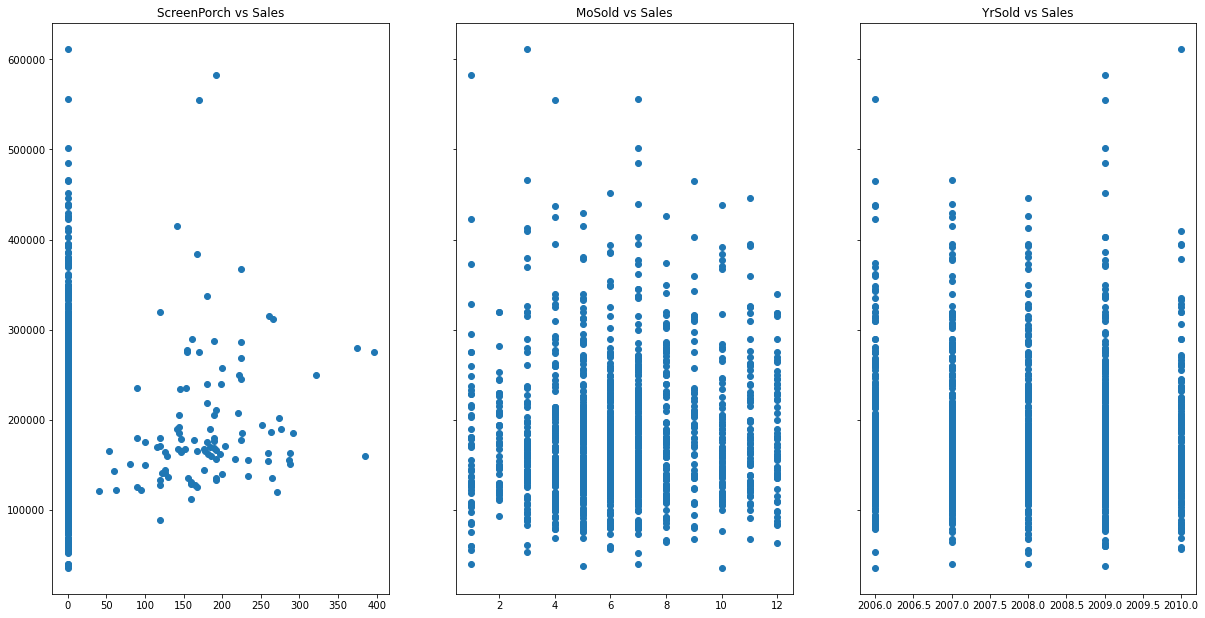

In [38]:
fig, ax = plt.subplots(ncols=3, sharey=True)

list_of_columns_6 = ["ScreenPorch", "MoSold", "YrSold"]
flag_i = 0
for x in list_of_columns_6:
    plot_title = x +' vs Sales'
    column = ax[flag_i].scatter(df_house_price_prediction[x], df_house_price_prediction['SalePrice'])
    column.set_label(x)
    ax[flag_i].set_title(plot_title)
    flag_i = flag_i + 1

fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()

In [39]:
#The Categorical columns
df_house_price_prediction.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'], dtype='object')

<h2>Correlation</h2>
Lets check how these variables are corelated with each other

In [40]:
df_house_price_prediction.corr()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch    MoSold    YrSold  SalePrice
MSSubClass       1.000000    -0.425187 -0.369099     0.090690    -0.072448   0.122090      0.084129    0.054778   -0.051959   -0.059338  -0.159733    -0.251979 -0.294396  0.311003           NaN   0.050132      0.026717     -0.006741  0.101069  0.227143     -0.118545           NaN     -0.038974   -0.004254     0.120312    0.001658   -0.070819    0.015978     0.012697      -0.038133    -0.021604 -0.017910 -0.018475  -0.048687
LotFrontage     -0.425187     1.000000  0.522820     0.230567    -0.060769   0.146645      0.081453    0.166417    0.132043    0.032642   0.150062     0.318227  0.355994  0.037037           NaN   0.305102      0.055338     -0.014919  0.172703  0.049849      0.263154           NaN      0.309855    0.222612     0.084835    0.306165    0.331507    0.086312     0.135821      -0.007528     0.052996  0.010662  0.007208   0.363022
LotArea         -0.369099     0.522820  1.000000     0.162689    -0.029780   0.054619      0.021362    0.135008    0.183677    0.054700   0.075983     0.299689  0.382030  0.089327           NaN   0.371310      0.089631      0.045155  0.164715  0.080633      0.281025           NaN      0.348038    0.293615     0.006837    0.287988    0.323688    0.171251     0.159597      -0.011207     0.093427 -0.009880 -0.022983   0.362222
OverallQual      0.090690     0.230567  0.162689     1.000000    -0.137345   0.599228      0.550117    0.415273    0.201327   -0.108322   0.344380     0.558339  0.503978  0.288731           NaN   0.641122      0.097250     -0.060343  0.618797  0.257954      0.143843           NaN      0.519535    0.380875     0.531680    0.631896    0.571237    0.227200     0.319979      -0.120626     0.038780  0.084229 -0.004752   0.809823
OverallCond     -0.072448    -0.060769 -0.029780    -0.137345     1.000000  -0.409069      0.041759   -0.137891   -0.039483    0.045371  -0.148921    -0.190837 -0.140903  0.007927           NaN  -0.100764     -0.044657      0.136933 -0.216599 -0.071536      0.018274           NaN     -0.060010   -0.051029    -0.338994   -0.211363   -0.176809   -0.031163    -0.064908       0.090560     0.042613  0.002264  0.044080  -0.123561
YearBuilt        0.122090     0.146645  0.054619     0.599228    -0.409069   1.000000      0.615544    0.310607    0.238567   -0.079815   0.181871     0.429192  0.316285  0.063589           NaN   0.298233      0.179082     -0.047904  0.565665  0.232649     -0.019124           NaN      0.205317    0.145105     0.811446    0.570340    0.509288    0.229533     0.256483      -0.390298    -0.050073  0.026814 -0.004657   0.568003
YearRemodAdd     0.084129     0.081453  0.021362     0.550117     0.041759   0.615544      1.000000    0.177172    0.101417   -0.109414   0.215223     0.308445  0.267731  0.149896           NaN   0.337498      0.108220     -0.022534  0.496577  0.168285     -0.010541           NaN      0.263796    0.093186     0.632908    0.454468    0.396036    0.191081     0.259675      -0.212482    -0.050944  0.023970  0.045584   0.526643
MasVnrArea       0.054778     0.166417  0.135008     0.415273    -0.137891   0.310607      0.177172    1.000000    0.226364   -0.066277   0.123882     0.356874  0.343273  0.146288           NaN   0.392089      0.089578     -0.000441  0.277077  0.196238      0.099981           NaN      0.303113    0.254996     0.252768    0.375337    0.379219    0.156644     0.135263      -0.102353     0.055842 -0.005099  0.007738   0.480634
BsmtFinSF1      -0.051959     0.132043  0.183677     0.201327    -0.039483   0.238567      0.101417    0.226364    1.000000   -0.056726  -0.546126     0.453605  0.

<h2>Let’s visualize these numbers using a heatmap.</h2>

<AxesSubplot:title={'center':'Correlation Matrix'}>

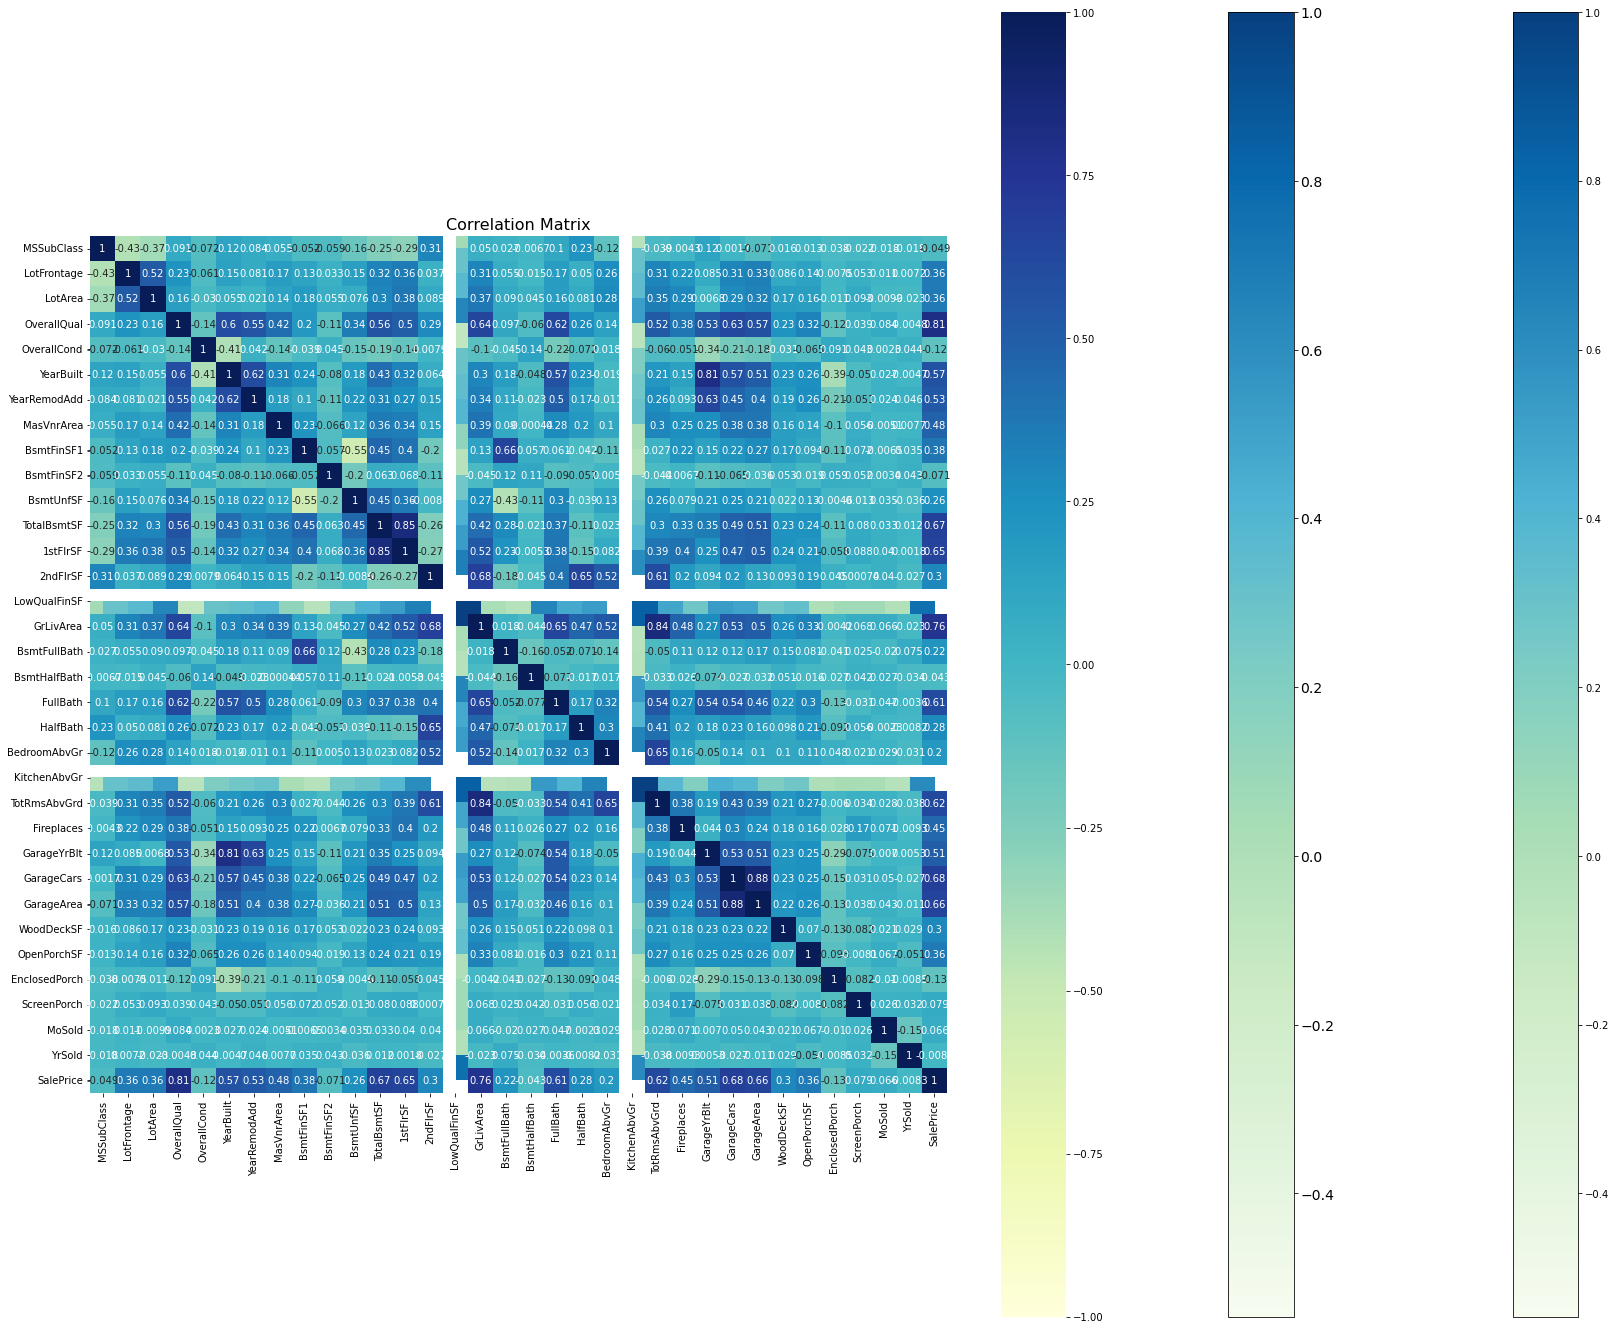

In [41]:
f = plt.figure(figsize=(30, 24))
plt.imshow(df_house_price_prediction.corr(), cmap=plt.cm.GnBu,        interpolation='nearest',data=True)
plt.colorbar()
house_price_points = [i for i in range(len(df_house_price_prediction.columns))]
plt.xticks(house_price_points, df_house_price_prediction.columns, rotation=45)
plt.yticks(house_price_points, df_house_price_prediction.columns, rotation=45)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)
sns.heatmap(df_house_price_prediction.corr(),vmin=-1.0,vmax=1.0,annot=True, cmap="YlGnBu")

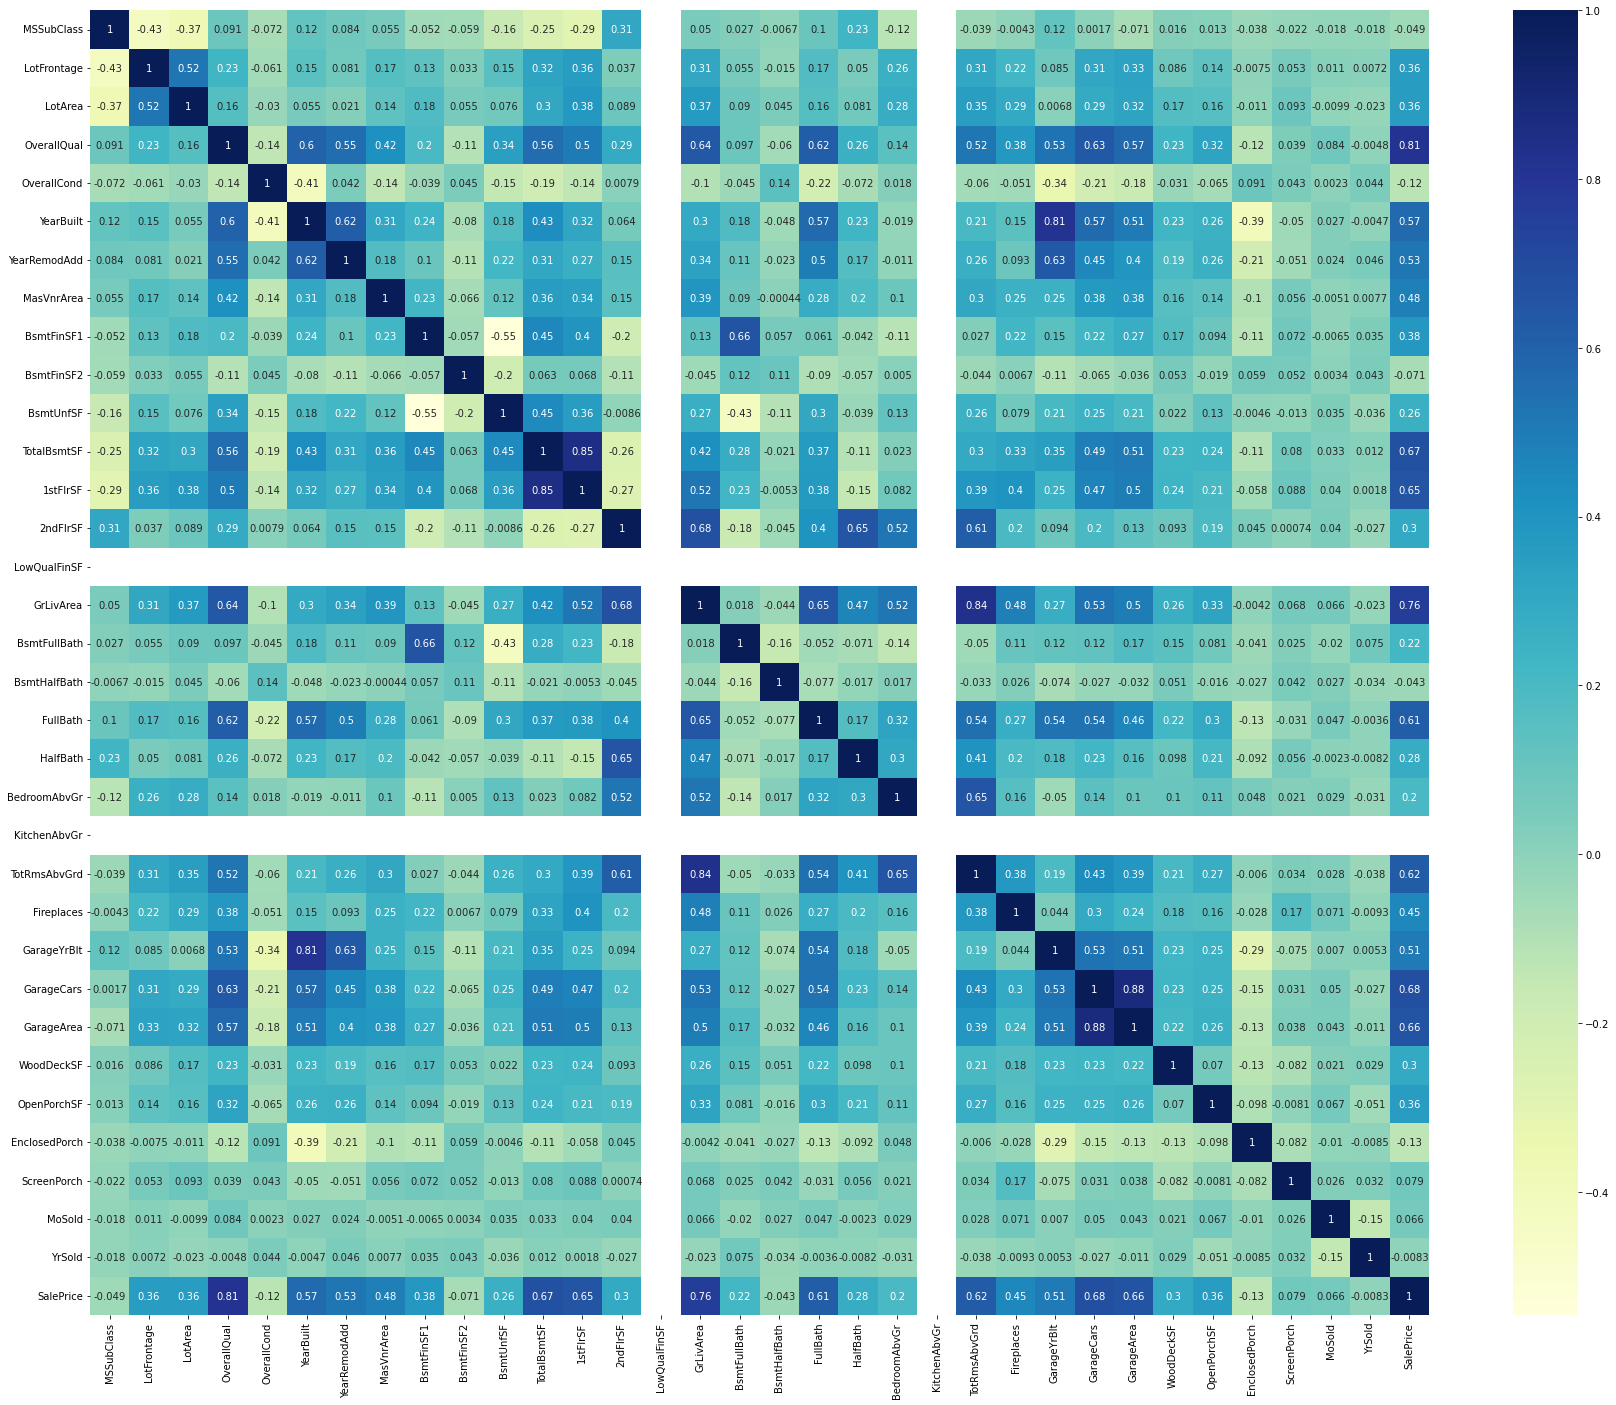

In [42]:
# Let's look at the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (30, 24))
sns.heatmap(df_house_price_prediction.corr(), annot = True, cmap="YlGnBu")
plt.show()

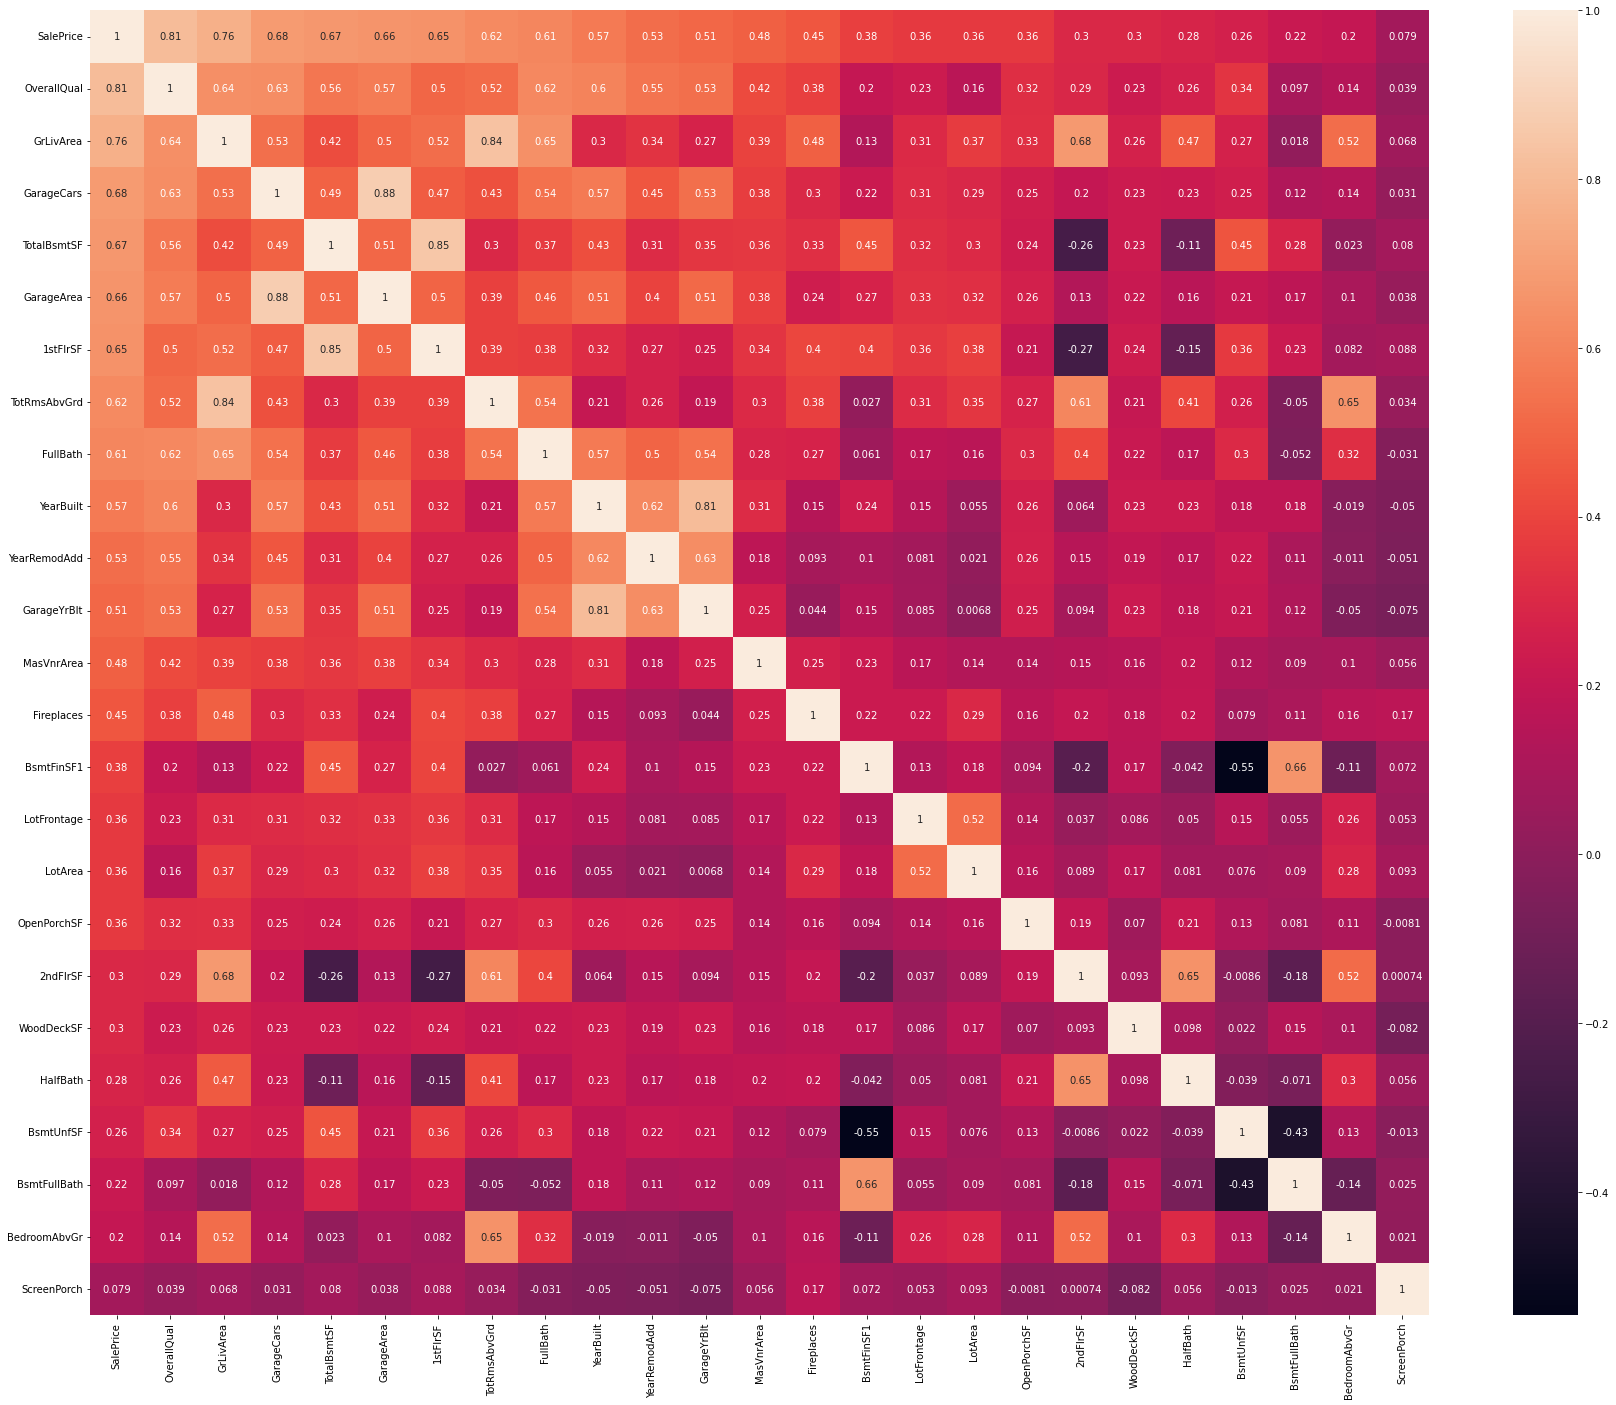

In [43]:
#correlation matrix of sales price 
plt.figure(figsize = (30, 24))
n_corr = 25 # the number of variables that have the highest correlation with "sale price"

corrmat = df_house_price_prediction.corr()

cols_house_price_prediction = corrmat.nlargest(n_corr, 'SalePrice')['SalePrice'].index
#plt.figure(dpi=100)
sns.heatmap(df_house_price_prediction[cols_house_price_prediction].corr(),annot=True)
plt.show()

<h2>Creating Dummy Variables</h2>

In [44]:
#The Categorical columns
df_house_price_prediction.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'], dtype='object')

In [45]:
# Converting categorical value into Dummy variable
df_house_price_prediction=pd.get_dummies(df_house_price_prediction,drop_first=True)
df_house_price_prediction.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MoSold  YrSold  SalePrice  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
0          60         65.0     8450            7            5       2003          2003       196.0         706           0        150          856       856       854             0       1710             1             0         2         1             3             1             8           0       2003.0           2         548           0           61              0            0       2    2008     208500            0            0            1            0            1             0             0             1                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     1                     0                     0                     0                    0                     0                     0                   0                     0                    0   
1          20         80.0     9600            6            8       1976          1976         0.0         978           0        284         1262      1262         0             0       1262             0             1         2         0             3             1             6           1       1976.0           2         460         298            0              0            0       5    2007     181500            0            0            1            0            1             0             0             1                0                0                1                 0                  0              1              0                 0              0              0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   0                     0                    0   
2          60         68.0    11250            7            5       2001          2002       162.0         486           0        434          920       920       866             0       1786             1             0         2         1             3             1             6           1       2001.0           2         608           0           42              0            0       9    2008     223500            0            0            1            0            1             0             0             0                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     1                     0                     0                     0                    0                     0                     0                   0                     0                    0   
3          70         60.0     9550        

<h2>Split the data in two different sets</h2>
We will split the data in 7:3 ratio

In [46]:
#Split the data into train and test
y_house_price_prediction = df_house_price_prediction.pop('SalePrice')
y_house_price_prediction.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [47]:
X_house_price_prediction = df_house_price_prediction
X_house_price_prediction.shape

(1333, 221)

In [48]:
#import train_test_split to split the data
from sklearn.model_selection import train_test_split

In [49]:
X_house_price_prediction_train, X_house_price_prediction_test, y_house_price_prediction_train, y_house_price_prediction_test = train_test_split(X_house_price_prediction, y_house_price_prediction, train_size=0.7, test_size=0.3, random_state=42)

In [50]:
X_house_price_prediction_train.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MoSold  YrSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
366          20         69.0     9500            6            5       1963          1963       247.0         609           0        785         1394      1394         0             0       1394             1             0         1         1             3             1             6           2       1963.0           2         514           0           76              0          185       7    2009            0            0            1            0            1             0             0             0                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   1                     0                    0   
390          50         50.0     8405            5            8       1900          1950         0.0         241         391        229          861       961       406             0       1367             1             0         1         0             4             1             7           0       1978.0           1         384           0          130            112            0       4    2008            0            0            1            0            1             0             0             1                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     0                     0                     1                     0                    0                     0                     0                   0                     0                    0   
154          30         84.0    11340            6            5       1923          1950         0.0           0           0       1200         1200      1200         0             0       1200             0             0         1         0             4             1             7           0       1923.0           1         312           0            0            228            0       3    2006            0            0            0            1            1             0             0             1                0                0                1                 0                  0              0              0                 0              0              0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   0                     0                    0   
417          70         86.0    22420            6            6       1918       

In [51]:
print('X_house_price_prediction_train shape',X_house_price_prediction_train.shape)
print('X_house_price_prediction_test shape',X_house_price_prediction_test.shape)
print('y_house_price_prediction_train shape',y_house_price_prediction_train.shape)
print('y_house_price_prediction_test shape',y_house_price_prediction_test.shape)

X_house_price_prediction_train shape (933, 221)
X_house_price_prediction_test shape (400, 221)
y_house_price_prediction_train shape (933,)
y_house_price_prediction_test shape (400,)


<h2>Scaling of numeric varaibles</h2>

In [52]:
X_house_price_prediction_train.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MoSold  YrSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
366          20         69.0     9500            6            5       1963          1963       247.0         609           0        785         1394      1394         0             0       1394             1             0         1         1             3             1             6           2       1963.0           2         514           0           76              0          185       7    2009            0            0            1            0            1             0             0             0                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   1                     0                    0   
390          50         50.0     8405            5            8       1900          1950         0.0         241         391        229          861       961       406             0       1367             1             0         1         0             4             1             7           0       1978.0           1         384           0          130            112            0       4    2008            0            0            1            0            1             0             0             1                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     0                     0                     1                     0                    0                     0                     0                   0                     0                    0   
154          30         84.0    11340            6            5       1923          1950         0.0           0           0       1200         1200      1200         0             0       1200             0             0         1         0             4             1             7           0       1923.0           1         312           0            0            228            0       3    2006            0            0            0            1            1             0             0             1                0                0                1                 0                  0              0              0                 0              0              0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   0                     0                    0   
417          70         86.0    22420            6            6       1918       

In [53]:
y_house_price_prediction_train.head()

366    159000
390    119000
154    125000
417    239000
323    126175
Name: SalePrice, dtype: int64

In [54]:
X_house_price_prediction_test.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MoSold  YrSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
990           60         82.0     9452            8            5       1997          1998       423.0        1074           0        322         1396      1407       985             0       2392             1             0         2         1             3             1             7           1       1997.0           3         870           0           70              0            0       6    2006            0            0            1            0            1             0             0             1                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   0                     0                    0   
1161          20         69.0    14778            6            7       1954          2006        72.0         728           0        568         1296      1640         0             0       1640             1             0         1         0             3             1             7           1       1993.0           2         924         108            0              0            0      11    2008            0            0            1            0            1             0             0             0                0                1                0                 0                  1              0              0                 0              0              0                     0                    0                     0                     0                     0                     1                     0                     0                    0                     0                     0                   0                     0                    0   
1369          20         48.0    10635            8            5       2003          2003       171.0         370         972        315         1657      1668         0             0       1668             1             0         2         0             3             1             8           1       2003.0           2         502           0          262              0            0       5    2010            0            0            1            0            1             1             0             0                0                0                1                 0                  0              1              0                 0              0              0                     0                    0                     0                     0                     1                     0                     0                     0                    0                     0                     0                   0                     0                    0   
329           70         60.0     6402            5            5       1920   

In [55]:
y_house_price_prediction_test.head()

990     348000
1161    224000
1369    232000
329      78000
262     151000
Name: SalePrice, dtype: int64

In [56]:
# The columns need to be scaled
X_house_price_prediction_train.select_dtypes(include=['int64','int32','float64','float32']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold'], dtype='object')

In [57]:
num_vars_cols= ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 
           'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
           '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
           'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
           'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold', 'Street_Pave']
X_house_price_prediction_train[num_vars_cols].head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MoSold  YrSold  Street_Pave
366          20         69.0     9500            6            5       1963          1963       247.0         609           0        785         1394      1394         0             0       1394             1             0         1         1             3             1             6           2       1963.0           2         514           0           76              0          185       7    2009            1
390          50         50.0     8405            5            8       1900          1950         0.0         241         391        229          861       961       406             0       1367             1             0         1         0             4             1             7           0       1978.0           1         384           0          130            112            0       4    2008            1
154          30         84.0    11340            6            5       1923          1950         0.0           0           0       1200         1200      1200         0             0       1200             0             0         1         0             4             1             7           0       1923.0           1         312           0            0            228            0       3    2006            1
417          70         86.0    22420            6            6       1918          1950         0.0        1128           0        242         1370      1370      1254             0       2624             1             0         2         1             4             1            10           1       1918.0           3         864           0            0              0            0      11    2007            1
323          20         49.0     5820            3            8       1955          2005         0.0         256           0        906         1162      1163         0             0       1163             1             0         1         0             3             1             6           0       1955.0           1         220         142           98              0            0       7    2006            1

In [58]:
X_house_price_prediction_train.describe()

MSSubClass  LotFrontage       LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath    FullBath    HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch      MoSold       YrSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  \
count  933.000000   933.000000    933.000000   933.000000   933.000000   933.000000    933.000000   933.000000   933.000000  933.000000   933.000000   933.000000   933.000000   933.000000         933.0   933.000000    933.000000    933.000000  933.000000  933.000000    933.000000         933.0    933.000000  933.000000   933.000000  933.000000   933.000000  933.000000   933.000000     933.000000   933.000000  933.000000   933.000000   933.000000   933.000000   933.000000   933.000000   933.000000    933.000000    933.000000    933.000000       933.000000       933.000000       933.000000        933.000000         933.000000     933.000000     933.000000        933.000000     933.000000     933.000000            933.000000           933.000000            933.000000            933.000000            933.000000            933.000000            933.000000            933.000000           933.000000            933.000000            933.000000          933.000000            933.000000   
mean    54.013934    69.152197   9756.684887     6.103966     5.589496  1973.098607   1985.614148   103.364416   444.513398   42.081458   568.284030  1054.878885  1150.559486   331.632369           0.0  1482.191854      0.426581      0.056806    1.536977    0.391211      2.814577           1.0      6.408360    0.620579  1979.133976    1.788853   478.821008   93.419078    45.391211      22.583065    13.326902    6.229368  2007.817792     0.047160     0.006431     0.800643     0.138264     0.995713      0.024652      0.007503      0.635584         0.033226         0.021436         0.906752          0.001072           0.063237       0.033226       0.004287          0.721329       0.047160       0.006431              0.001072             0.015005              0.033226              0.017149              0.106109              0.034298              0.067524              0.062165             0.020364              0.015005              0.031083            0.155413              0.006431   
std     41.474859    20.155628   4294.984750     1.327699     1.095140    29.071152     20.532062   173.723882   429.919669  139.822442   434.138852   403.955920   367.480778   420.745898           0.0   477.733361      0.501308      0.236183    0.536215    0.496995      0.736045           0.0      1.492979    0.631509    23.689612    0.708171   205.910808  122.602778    59.877649      61.327122    49.364821    2.715975     1.341411     0.212094     0.079977     0.399731     0.345362     0.065372      0.155144      0.086339      0.481524         0.179323         0.144911         0.290935          0.032739           0.243519       0.179323       0.065372          0.448586       0.212094       0.079977              0.032739             0.121639              0.179323              0.129896              0.308143              0.182091              0.251062              0.241585             0.141319              0.121639              0.173634            0.362492              0.079977   
min     20.000000    21.000

In [59]:
X_house_price_prediction_train.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MoSold  YrSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
366          20         69.0     9500            6            5       1963          1963       247.0         609           0        785         1394      1394         0             0       1394             1             0         1         1             3             1             6           2       1963.0           2         514           0           76              0          185       7    2009            0            0            1            0            1             0             0             0                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   1                     0                    0   
390          50         50.0     8405            5            8       1900          1950         0.0         241         391        229          861       961       406             0       1367             1             0         1         0             4             1             7           0       1978.0           1         384           0          130            112            0       4    2008            0            0            1            0            1             0             0             1                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     0                     0                     1                     0                    0                     0                     0                   0                     0                    0   
154          30         84.0    11340            6            5       1923          1950         0.0           0           0       1200         1200      1200         0             0       1200             0             0         1         0             4             1             7           0       1923.0           1         312           0            0            228            0       3    2006            0            0            0            1            1             0             0             1                0                0                1                 0                  0              0              0                 0              0              0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   0                     0                    0   
417          70         86.0    22420            6            6       1918       

In [60]:
#Scaling using MinMax. It will shrink the data between 0 to 1
from sklearn.preprocessing import StandardScaler,MinMaxScaler

scaler_house_price_prediction=MinMaxScaler()

In [61]:
X_house_price_prediction_train[num_vars_cols] = scaler_house_price_prediction.fit_transform(X_house_price_prediction_train[num_vars_cols])
X_house_price_prediction_test[num_vars_cols] = scaler_house_price_prediction.transform(X_house_price_prediction_test[num_vars_cols])

In [62]:
X_house_price_prediction_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch    MoSold  YrSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
366    0.000000     0.298137  0.228770     0.555556        0.500   0.656716      0.216667    0.218778    0.278336    0.000000   0.336045     0.434810  0.332606  0.000000           0.0   0.308055           0.5           0.0  0.333333       0.5      0.500000           0.0      0.333333    0.666667         0.53        0.50    0.369784    0.000000     0.208791       0.000000     0.467172  0.545455    0.75            0            0            1            0          1.0             0             0             0                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   1                     0                    0   
390    0.176471     0.180124  0.197492     0.444444        0.875   0.186567      0.000000    0.000000    0.110146    0.431567   0.098031     0.268559  0.175036  0.252017           0.0   0.298955           0.5           0.0  0.333333       0.0      0.666667           0.0      0.444444    0.000000         0.68        0.25    0.276259    0.000000     0.357143       0.290155     0.000000  0.272727    0.50            0            0            1            0          1.0             0             0             1                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     0                     0                     1                     0                    0                     0                     0                   0                     0                    0   
154    0.058824     0.391304  0.281328     0.555556        0.500   0.358209      0.000000    0.000000    0.000000    0.000000   0.513699     0.374298  0.262009  0.000000           0.0   0.242669           0.0           0.0  0.333333       0.0      0.666667           0.0      0.444444    0.000000         0.13        0.25    0.224460    0.000000     0.000000       0.590674     0.000000  0.181818    0.00            0            0            0            1          1.0             0             0             1                0                0                1                 0                  0              0              0                 0              0              0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   0                     0                    0   
417    0.294118     0.403727  0.597818     0.555556        0.625   0.

In [63]:
X_house_price_prediction_test.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch    MoSold  YrSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
990     0.235294     0.378882  0.227399     0.777778         0.50   0.910448      0.800000    0.374668    0.490859    0.000000   0.137842     0.435434  0.337336  0.611421           0.0   0.644422           0.5           0.0  0.666667       0.5           0.5           0.0      0.444444    0.333333         0.87        0.75    0.625899    0.000000     0.192308       0.000000          0.0  0.454545    0.00            0            0            1            0          1.0             0             0             1                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   0                     0                    0   
1161    0.000000     0.298137  0.379531     0.555556         0.75   0.589552      0.933333    0.063773    0.332724    0.000000   0.243151     0.404242  0.422125  0.000000           0.0   0.390967           0.5           0.0  0.333333       0.0           0.5           0.0      0.444444    0.333333         0.83        0.50    0.664748    0.146739     0.000000       0.000000          0.0  0.909091    0.50            0            0            1            0          1.0             0             0             0                0                1                0                 0                  1              0              0                 0              0              0                     0                    0                     0                     0                     0                     1                     0                     0                    0                     0                     0                   0                     0                    0   
1369    0.000000     0.167702  0.261190     0.777778         0.50   0.955224      0.883333    0.151461    0.169104    1.072848   0.134846     0.516843  0.432314  0.000000           0.0   0.400404           0.5           0.0  0.666667       0.0           0.5           0.0      0.555556    0.333333         0.93        0.50    0.361151    0.000000     0.719780       0.000000          0.0  0.363636    1.00            0            0            1            0          1.0             1             0             0                0                0                1                 0                  0              1              0                 0              0              0                     0                    0                     0                     0                     1                     0                     0                     0                    0                     0                     0                   0                     0                    0   
329     0.294118     0.242236  0.140278     0.444444         0.50 

In [64]:
X_house_price_prediction_train.describe()

MSSubClass  LotFrontage     LotArea  OverallQual  OverallCond   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2   BsmtUnfSF  TotalBsmtSF    1stFlrSF    2ndFlrSF  LowQualFinSF   GrLivArea  BsmtFullBath  BsmtHalfBath    FullBath    HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch      MoSold      YrSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  \
count  933.000000   933.000000  933.000000   933.000000   933.000000  933.000000    933.000000  933.000000  933.000000  933.000000  933.000000   933.000000  933.000000  933.000000         933.0  933.000000    933.000000    933.000000  933.000000  933.000000    933.000000         933.0    933.000000  933.000000   933.000000  933.000000  933.000000  933.000000   933.000000     933.000000   933.000000  933.000000  933.000000   933.000000   933.000000   933.000000   933.000000   933.000000    933.000000    933.000000    933.000000       933.000000       933.000000       933.000000        933.000000         933.000000     933.000000     933.000000        933.000000     933.000000     933.000000            933.000000           933.000000            933.000000            933.000000            933.000000            933.000000            933.000000            933.000000           933.000000            933.000000            933.000000          933.000000            933.000000   
mean     0.200082     0.299082    0.236102     0.567107     0.573687    0.732079      0.593569    0.091554    0.203160    0.046448    0.243272     0.329033    0.244017    0.205855           0.0    0.337780      0.213290      0.028403    0.512326    0.195606      0.469096           0.0      0.378707    0.206860     0.691340    0.447213    0.344476    0.126928     0.124701       0.058505     0.033654    0.475397    0.454448     0.047160     0.006431     0.800643     0.138264     0.995713      0.024652      0.007503      0.635584         0.033226         0.021436         0.906752          0.001072           0.063237       0.033226       0.004287          0.721329       0.047160       0.006431              0.001072             0.015005              0.033226              0.017149              0.106109              0.034298              0.067524              0.062165             0.020364              0.015005              0.031083            0.155413              0.006431   
std      0.243970     0.125190    0.122682     0.147522     0.136892    0.216949      0.342201    0.153874    0.196490    0.154329    0.185847     0.126000    0.133727    0.261171           0.0    0.161016      0.250654      0.118092    0.178738    0.248498      0.122674           0.0      0.165887    0.210503     0.236896    0.177043    0.148137    0.166580     0.164499       0.158879     0.124659    0.246907    0.335353     0.212094     0.079977     0.399731     0.345362     0.065372      0.155144      0.086339      0.481524         0.179323         0.144911         0.290935          0.032739           0.243519       0.179323       0.065372          0.448586       0.212094       0.079977              0.032739             0.121639              0.179323              0.129896              0.308143              0.182091              0.251062              0.241585             0.141319              0.121639              0.173634            0.362492              0.079977   
min      0.000000     0.000000    0.000000     0.000000     0.000000   

In [65]:
X_house_price_prediction_train.shape

(933, 221)

<h2>Model Building and Evaluation</h2>
we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE

RFE:- 
Recursive feature elimination

In [66]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [67]:
# Running RFE with variable output number equal to 10
lm_house_price_prediction = LinearRegression()
lm_house_price_prediction.fit(X_house_price_prediction_train, y_house_price_prediction_train)

rfe_house_price_prediction = RFE(lm_house_price_prediction, 25)             # running RFE
rfe_house_price_prediction = rfe_house_price_prediction.fit(X_house_price_prediction_train, y_house_price_prediction_train)

In [68]:
#Finding the top features
list(zip(X_house_price_prediction_train.columns,rfe_house_price_prediction.support_,rfe_house_price_prediction.ranking_))

[('MSSubClass', False, 60),
 ('LotFrontage', False, 67),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 127),
 ('MasVnrArea', False, 50),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 7),
 ('BsmtUnfSF', False, 6),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 17),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 181),
 ('BsmtHalfBath', False, 131),
 ('FullBath', False, 145),
 ('HalfBath', False, 180),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', False, 26),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', False, 166),
 ('GarageYrBlt', False, 134),
 ('GarageCars', False, 28),
 ('GarageArea', False, 191),
 ('WoodDeckSF', False, 66),
 ('OpenPorchSF', False, 76),
 ('EnclosedPorch', False, 107),
 ('ScreenPorch', False, 46),
 ('MoSold', False, 189),
 ('YrSold', False, 162),
 ('MSZoning_FV', False, 42),
 ('MSZoning_RH', False, 54),
 ('MSZoning_RL', False, 56),


In [69]:
# Extracting the top features
col_top_features = X_house_price_prediction_train.columns[rfe_house_price_prediction.support_]
col_top_features

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Street_Pave', 'LandSlope_Sev', 'RoofStyle_Gable', 'RoofStyle_Hip', 'RoofStyle_Shed', 'RoofMatl_Metal', 'Exterior1st_CBlock', 'Exterior1st_Stone', 'Exterior2nd_CBlock', 'ExterQual_Gd', 'ExterQual_TA', 'Foundation_Wood', 'Heating_OthW', 'Functional_Maj2'], dtype='object')

In [70]:
# Extracting the non-important features
X_house_price_prediction_train.columns[~rfe_house_price_prediction.support_]

Index(['MSSubClass', 'LotFrontage', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial'], dtype='object', length=196)

In [71]:
#Check the shape of train and test
X_house_price_prediction_train1=X_house_price_prediction_train[col_top_features]
X_house_price_prediction_test1=X_house_price_prediction_test[col_top_features]
print(X_house_price_prediction_train1.shape)
print(X_house_price_prediction_test1.shape)
print(y_house_price_prediction_train.shape)
print(y_house_price_prediction_test.shape)

(933, 25)
(400, 25)
(933,)
(400,)


In [72]:
lm1_house_price_prediction=lm_house_price_prediction.fit(X_house_price_prediction_train, y_house_price_prediction_train)

In [73]:
# Print the coefficients and intercept
print(lm1_house_price_prediction.intercept_)
print(lm1_house_price_prediction.coef_)

-2.211853060200272e+16
[-1.51119271e+04  1.52728433e+04  3.87694179e+04  5.36358957e+04
  4.34419428e+04  3.74604891e+04  6.72119978e+03  1.97811171e+04
 -4.23518794e+16 -1.75369300e+16 -4.52166318e+16  6.20567301e+16
  3.35974463e+15  1.96963195e+15  2.53432759e+16 -3.62749720e+15
  1.28275000e+03 -5.94428125e+03  8.66587500e+03  1.33600000e+03
 -3.65793750e+04 -2.56313601e+16  3.16647500e+04  2.29984375e+03
 -5.24475000e+03  1.71555000e+04 -2.94500000e+02  1.23100000e+04
  1.00785000e+04  8.19075000e+03  2.05788711e+04 -5.20500000e+02
 -2.88450000e+03  3.70245000e+04  3.13849375e+04  2.68150000e+04
  1.85010000e+04  4.25945000e+04  1.26131250e+03 -5.80071875e+03
  2.45012500e+03  9.90575000e+03 -1.38140625e+04  1.11650000e+03
 -4.63868750e+04  7.62293750e+03 -5.51206250e+03 -1.46355312e+04
 -2.60300000e+03  1.61203125e+02 -4.59467500e+04  1.62313750e+04
  9.39850000e+03 -3.30475000e+03 -1.73733750e+04 -1.02423750e+04
  9.39750000e+03 -1.87835000e+04 -1.21145000e+04 -1.19822500e+04
  

In [74]:
#import libraries for model evalution
from sklearn.metrics import r2_score, mean_squared_error

In [75]:
y_house_price_prediction_pred_train = rfe_house_price_prediction.predict(X_house_price_prediction_train)
y_house_price_prediction_pred_test = rfe_house_price_prediction.predict(X_house_price_prediction_test)

metric_house = []

#r2score

r2_house_train_lr = r2_score(y_house_price_prediction_train, y_house_price_prediction_pred_train)
print("R2score of train data: ",r2_house_train_lr)
metric_house.append(r2_house_train_lr)

r2_house_test_lr = r2_score(y_house_price_prediction_test, y_house_price_prediction_pred_test)
print("R2score of test data: ",r2_house_test_lr)
metric_house.append(r2_house_test_lr)

#RSS residual sum of squares
rss1_house_lr = np.sum(np.square(y_house_price_prediction_train - y_house_price_prediction_pred_train))
print("RSS of train data: ",rss1_house_lr)
metric_house.append(rss1_house_lr)

rss2_house_lr = np.sum(np.square(y_house_price_prediction_test - y_house_price_prediction_pred_test))
print("RSS of test data: ",rss2_house_lr)
metric_house.append(rss2_house_lr)
#RMSE  root mean squared error
mse_house_train_lr = mean_squared_error(y_house_price_prediction_train, y_house_price_prediction_pred_train)
print("RMSE of train data: ", mse_house_train_lr)
metric_house.append(mse_house_train_lr**0.5)

mse_house_test_lr = mean_squared_error(y_house_price_prediction_test, y_house_price_prediction_pred_test)
print("RMSE of test data: ", mse_house_test_lr)
metric_house.append(mse_house_test_lr**0.5)

R2score of train data:  0.884769859136684
R2score of test data:  0.8644012334989227
RSS of train data:  606799143030.2705
RSS of test data:  308800262115.81445
RMSE of train data:  650374215.4665278
RMSE of test data:  772000655.2895361


<h2>Lasso and Ridge Regression</h2>

In [76]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

<h2>Parameters of alpha</h2>

In [77]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# cross validation
folds = 5

<h2>Lasso</h2>

In [78]:
lasso_house = Lasso()

# cross validation
lasso_house_model_cv = GridSearchCV(estimator = lasso_house, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_house_model_cv.fit(X_house_price_prediction_train1, y_house_price_prediction_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [79]:
print(lasso_house_model_cv.best_params_)
print(lasso_house_model_cv.best_score_)

{'alpha': 50}
-18596.95352101485


In [80]:
alpha =50

lasso_house = Lasso(alpha=alpha)
        
lasso_house.fit(X_house_price_prediction_train1, y_house_price_prediction_train) 
lasso_house.coef_


array([ 59127.11070707, 125870.1843468 ,  38489.04821495,  56404.87529725,
        49800.5104336 ,  77939.13058643,  10484.38776825,      0.        ,
       158477.10623331, -54311.41028164,  49056.0824901 ,  49410.5710817 ,
       -17590.84811109,     -0.        ,     -0.        ,      0.        ,
            0.        , -18639.09586132, -28272.31628684,     -0.        ,
       -52963.32293569, -62174.81836936,     -0.        ,     -0.        ,
        -2854.32741884])

In [81]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_house_price_prediction_pred_train = lasso_house.predict(X_house_price_prediction_train1)
y_house_price_prediction_pred_test = lasso_house.predict(X_house_price_prediction_test1)

metric3_house = []
r2_house_train_lr = r2_score(y_house_price_prediction_train, y_house_price_prediction_pred_train)
print("R2score of train data: ",r2_house_train_lr)
metric3_house.append(r2_house_train_lr)

r2_house_test_lr = r2_score(y_house_price_prediction_test, y_house_price_prediction_pred_test)
print("R2score of test data: ",r2_house_test_lr)
metric3_house.append(r2_house_test_lr)

rss1_house_lr = np.sum(np.square(y_house_price_prediction_train - y_house_price_prediction_pred_train))
print("RSS of train data: ",rss1_house_lr)
metric3_house.append(rss1_house_lr)

rss2_house_lr = np.sum(np.square(y_house_price_prediction_test - y_house_price_prediction_pred_test))
print("RSS of test data: ",rss2_house_lr)
metric3_house.append(rss2_house_lr)

mse_house_train_lr = mean_squared_error(y_house_price_prediction_train, y_house_price_prediction_pred_train)
print("RMSE of train data: ",mse_house_train_lr)
metric3_house.append(mse_house_train_lr**0.5)

mse_house_test_lr = mean_squared_error(y_house_price_prediction_test, y_house_price_prediction_pred_test)
print("RMSE of test data: ",mse_house_test_lr)
metric3_house.append(mse_house_test_lr**0.5)

R2score of train data:  0.8818174221962254
R2score of test data:  0.8711012902623124
RSS of train data:  622346604761.1931
RSS of test data:  293542163992.1185
RMSE of train data:  667038161.5875596
RMSE of test data:  733855409.9802964


<h2>Ridge</h2>

In [82]:
ridge_house = Ridge()
ridge_house_model_cv = GridSearchCV(estimator = ridge_house, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_house_model_cv.fit(X_house_price_prediction_train1, y_house_price_prediction_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [83]:
print(ridge_house_model_cv.best_params_)
print(ridge_house_model_cv.best_score_)

{'alpha': 2.0}
-18447.25993301903


In [84]:
alpha = 2
ridge_house = Ridge(alpha=alpha)
ridge_house.fit(X_house_price_prediction_train1, y_house_price_prediction_train)
ridge_house.coef_

array([ 54085.52641849, 112466.01609633,  36170.84530393,  57414.55629352,
        51502.34409922,  74585.17364852,  72524.54031771,  35064.82100477,
        86210.60445964, -46172.06469989,  53660.35761222,  41019.72086417,
       -21340.78049575,  -3876.90868269,  -2955.42121449,   6174.28759073,
         9490.53666855, -16635.88435619, -24084.22010305, -16635.88435619,
       -50488.57563417, -62600.00947467,  -9457.31077928, -14373.63584225,
       -15799.82181616])

In [85]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_house_price_prediction_pred_train = ridge_house.predict(X_house_price_prediction_train1)
y_house_price_prediction_pred_test = ridge_house.predict(X_house_price_prediction_test1)

metric2_house = []
r2_house_train_lr = r2_score(y_house_price_prediction_train, y_house_price_prediction_pred_train)
print("R2score of train data: ",r2_house_train_lr)
metric2_house.append(r2_house_train_lr)

r2_house_test_lr = r2_score(y_house_price_prediction_test, y_house_price_prediction_pred_test)
print("R2score of test data: ",r2_house_test_lr)
metric2_house.append(r2_house_test_lr)

rss1_house_lr = np.sum(np.square(y_house_price_prediction_train - y_house_price_prediction_pred_train))
print("RSS of train data: ",rss1_house_lr)
metric2_house.append(rss1_house_lr)

rss2_house_lr = np.sum(np.square(y_house_price_prediction_test - y_house_price_prediction_pred_test))
print("RSS of test data: ",rss2_house_lr)
metric2_house.append(rss2_house_lr)

mse_house_train_lr = mean_squared_error(y_house_price_prediction_train, y_house_price_prediction_pred_train)
print("RMSE of train data: ",mse_house_train_lr)
metric2_house.append(mse_house_train_lr**0.5)

mse_house_test_lr = mean_squared_error(y_house_price_prediction_test, y_house_price_prediction_pred_test)
print("RMSE of test data: ",mse_house_test_lr)
metric2_house.append(mse_house_test_lr**0.5)

R2score of train data:  0.8811543246777606
R2score of test data:  0.8705197774958243
RSS of train data:  625838460302.9412
RSS of test data:  294866448123.5217
RMSE of train data:  670780772.0288758
RMSE of test data:  737166120.3088043


In [86]:
metric3_house

[0.8818174221962254,
 0.8711012902623124,
 622346604761.1931,
 293542163992.1185,
 25827.08194100835,
 27089.76577935469]

In [87]:
# Creating a table which contain all the metrics

lr_house_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric_house
        }

lr_house_metric = pd.DataFrame(lr_house_table ,columns = ['Metric', 'Linear Regression'] )

rg_house_metric = pd.Series(metric2_house, name = 'Ridge Regression')
ls_house_metric = pd.Series(metric3_house, name = 'Lasso Regression')

final_house_metric = pd.concat([lr_house_metric, rg_house_metric, ls_house_metric], axis = 1)

final_house_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       8.847699e-01      8.811543e-01      8.818174e-01
1   R2 Score (Test)       8.644012e-01      8.705198e-01      8.711013e-01
2       RSS (Train)       6.067991e+11      6.258385e+11      6.223466e+11
3        RSS (Test)       3.088003e+11      2.948664e+11      2.935422e+11
4       MSE (Train)       2.550244e+04      2.589944e+04      2.582708e+04
5        MSE (Test)       2.778490e+04      2.715080e+04      2.708977e+04

<h2>Model Evaluation</h2>

In [88]:
ridge_house_pred = ridge_house.predict(X_house_price_prediction_test1)

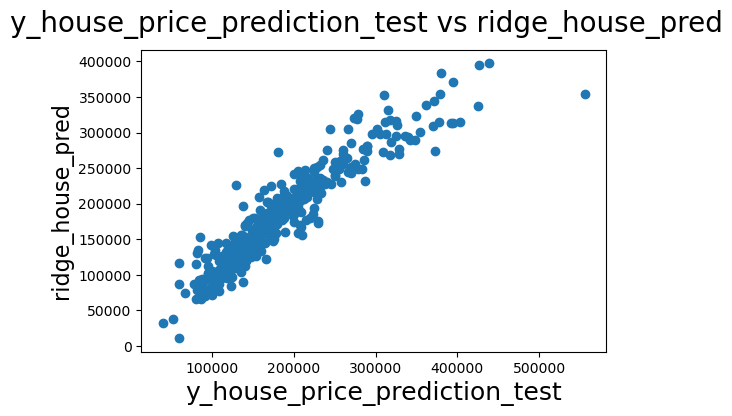

In [89]:
# Plotting y_test and y_pred to understand the spread for ridge regression.
fig = plt.figure(dpi=100)
plt.scatter(y_house_price_prediction_test,ridge_house_pred)
fig.suptitle('y_house_price_prediction_test vs ridge_house_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_house_price_prediction_test', fontsize=18)                          # X-label
plt.ylabel('ridge_house_pred', fontsize=16)  
plt.show()

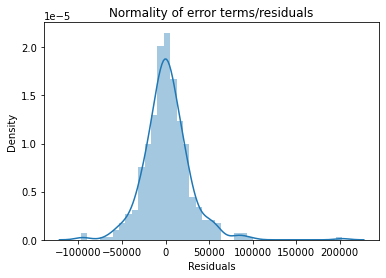

In [90]:
y_house_price_prediction_res=y_house_price_prediction_test-ridge_house_pred
# Distribution of errors
sns.distplot(y_house_price_prediction_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

In [91]:
lasso_house_pred = lasso_house.predict(X_house_price_prediction_test1)

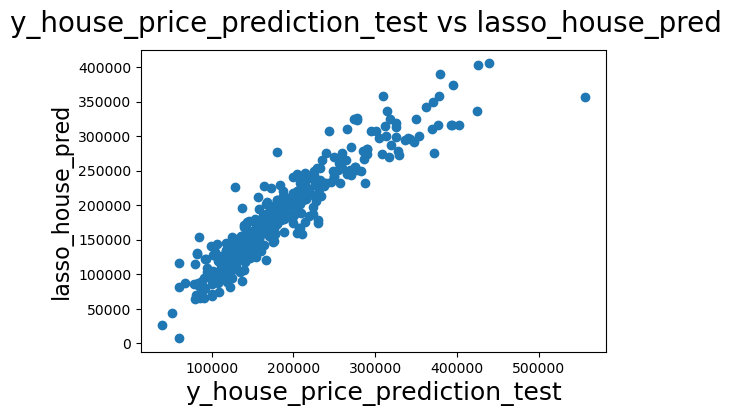

In [92]:
# Plotting y_test and y_pred to understand the spread for lasso regression.
fig = plt.figure(dpi=100)
plt.scatter(y_house_price_prediction_test,lasso_house_pred)
fig.suptitle('y_house_price_prediction_test vs lasso_house_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_house_price_prediction_test', fontsize=18)                          # X-label
plt.ylabel('lasso_house_pred', fontsize=16)  
plt.show()

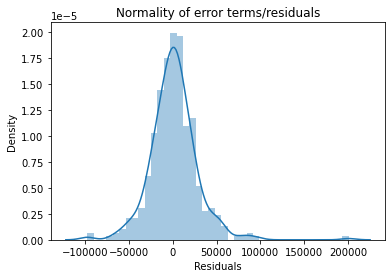

In [93]:
y_house_price_prediction_res=y_house_price_prediction_test-lasso_house_pred
# Distribution of errors
sns.distplot(y_house_price_prediction_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

<h2>Let's look at the changes in coefficients after regularization</h2>

In [94]:
betas_house = pd.DataFrame(index=X_house_price_prediction_train1.columns)

In [95]:
betas_house.rows = X_house_price_prediction_train1.columns

In [96]:
betas_house['Ridge'] = ridge_house.coef_
betas_house['Lasso'] = lasso_house.coef_

In [97]:
pd.set_option('display.max_rows', None)
betas_house.head(70)


Ridge          Lasso
LotArea              54085.526418   59127.110707
OverallQual         112466.016096  125870.184347
OverallCond          36170.845304   38489.048215
YearBuilt            57414.556294   56404.875297
BsmtFinSF1           51502.344099   49800.510434
TotalBsmtSF          74585.173649   77939.130586
1stFlrSF             72524.540318   10484.387768
2ndFlrSF             35064.821005       0.000000
GrLivArea            86210.604460  158477.106233
BedroomAbvGr        -46172.064700  -54311.410282
TotRmsAbvGrd         53660.357612   49056.082490
Street_Pave          41019.720864   49410.571082
LandSlope_Sev       -21340.780496  -17590.848111
RoofStyle_Gable      -3876.908683      -0.000000
RoofStyle_Hip        -2955.421214      -0.000000
RoofStyle_Shed        6174.287591       0.000000
RoofMatl_Metal        9490.536669       0.000000
Exterior1st_CBlock  -16635.884356  -18639.095861
Exterior1st_Stone   -24084.220103  -28272.316287
Exterior2nd_CBlock  -16635.884356      -0.000000
ExterQual_Gd        -50488.575634  -52963.322936
ExterQual_TA        -62600.009475  -62174.818369
Foundation_Wood      -9457.310779      -0.000000
Heating_OthW        -14373.635842      -0.000000
Functional_Maj2     -15799.821816   -2854.327419

<h2>Conclusions:</h2>

<p>Although the Ridge Regression model performed better in terms of R2 values for train and test,
it is better to use Lasso because it fetches and assigns a null value to non-essential features, allowing us to select
predictive variables.
    
It is always advisable to use a simple but robust model.</p>

<h3>Which variables are significant in predicting the price of a house,</h3>

<p>The variables listed below are significant in price prediction:</p>
<ul>
    <li>LotArea (Lot size in square feet)</li>
    <li>OverallQual (Rates the overall material and finish of the house)</li>
    <li>OverallCond (Rates the overall condition of the house)</li>
    <li>YearBuilt (Original construction date)</li>
    <li>BsmtFinSF1 (Type 1 finished square feet)</li>
    <li>TotalBsmtSF (Total square feet of basement area)</li>
    <li>GrLivArea (Above grade (ground) living area square feet)</li>
    <li>TotRmsAbvGrd (Total rooms above grade (does not include bathrooms))</li>
    <li>Street_Pave (Pave road access to property)</li>
</ul>
<h3>How well those variables describe the price of a house.</h3>

<table style="width:500px;text-align:center;font-size:20px;">
    <tr>
        <th>Metric</th>
        <th>Ridge</th>
        <th>Lasso</th>
    </tr>
    <tr>
        <td>R2 Score train</td>
        <td> 0.8811</td>
        <td> 0.8818</td>
    </tr>
    <tr>
        <td>R2 Score test</td>
        <td> 0.8705</td>
        <td> 0.8711</td>
    </tr>
</table>

<h3>The Optimal alpha value for ridge and lasso regression:-</h3>
<ul>
    <li>Ridge Alpha 2</li>
    <li>lasso Alpha 50</li>
</ul>

In [98]:
final_house_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       8.847699e-01      8.811543e-01      8.818174e-01
1   R2 Score (Test)       8.644012e-01      8.705198e-01      8.711013e-01
2       RSS (Train)       6.067991e+11      6.258385e+11      6.223466e+11
3        RSS (Test)       3.088003e+11      2.948664e+11      2.935422e+11
4       MSE (Train)       2.550244e+04      2.589944e+04      2.582708e+04
5        MSE (Test)       2.778490e+04      2.715080e+04      2.708977e+04

In [99]:
pd.set_option('display.max_rows', None)
betas_house.head(70)

Ridge          Lasso
LotArea              54085.526418   59127.110707
OverallQual         112466.016096  125870.184347
OverallCond          36170.845304   38489.048215
YearBuilt            57414.556294   56404.875297
BsmtFinSF1           51502.344099   49800.510434
TotalBsmtSF          74585.173649   77939.130586
1stFlrSF             72524.540318   10484.387768
2ndFlrSF             35064.821005       0.000000
GrLivArea            86210.604460  158477.106233
BedroomAbvGr        -46172.064700  -54311.410282
TotRmsAbvGrd         53660.357612   49056.082490
Street_Pave          41019.720864   49410.571082
LandSlope_Sev       -21340.780496  -17590.848111
RoofStyle_Gable      -3876.908683      -0.000000
RoofStyle_Hip        -2955.421214      -0.000000
RoofStyle_Shed        6174.287591       0.000000
RoofMatl_Metal        9490.536669       0.000000
Exterior1st_CBlock  -16635.884356  -18639.095861
Exterior1st_Stone   -24084.220103  -28272.316287
Exterior2nd_CBlock  -16635.884356      -0.000000
ExterQual_Gd        -50488.575634  -52963.322936
ExterQual_TA        -62600.009475  -62174.818369
Foundation_Wood      -9457.310779      -0.000000
Heating_OthW        -14373.635842      -0.000000
Functional_Maj2     -15799.821816   -2854.327419

<h2> What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? </h2>

<h2>Ridge Regression</h2>

In [100]:
#Change the alpha value from 2 to 4
alpha = 4
ridge2_house = Ridge(alpha=alpha)
ridge2_house.fit(X_house_price_prediction_train1, y_house_price_prediction_train)

Ridge(alpha=4)

In [101]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_house_price_prediction_pred_train = ridge2_house.predict(X_house_price_prediction_train1)
y_house_price_prediction_pred_test = ridge2_house.predict(X_house_price_prediction_test1)

metric2_house = []
r2_house_train_lr = r2_score(y_house_price_prediction_train, y_house_price_prediction_pred_train)
print("R2score of train data: ",r2_house_train_lr)
metric2_house.append(r2_house_train_lr)

r2_house_test_lr = r2_score(y_house_price_prediction_test, y_house_price_prediction_pred_test)
print("R2score of test data: ",r2_house_test_lr)
metric2_house.append(r2_house_test_lr)

rss1_house_lr = np.sum(np.square(y_house_price_prediction_train - y_house_price_prediction_pred_train))
print("RSS of train data: ",rss1_house_lr)
metric2_house.append(rss1_house_lr)

rss2_house_lr = np.sum(np.square(y_house_price_prediction_test - y_house_price_prediction_pred_test))
print("RSS of test data: ",rss2_house_lr)
metric2_house.append(rss2_house_lr)

mse_house_train_lr = mean_squared_error(y_house_price_prediction_train, y_house_price_prediction_pred_train)
print("RMSE of train data: ",mse_house_train_lr)
metric2_house.append(mse_house_train_lr**0.5)

mse_house_test_lr = mean_squared_error(y_house_price_prediction_test, y_house_price_prediction_pred_test)
print("RMSE of test data: ",mse_house_test_lr)
metric2_house.append(mse_house_test_lr**0.5)

R2score of train data:  0.8765838882231998
R2score of test data:  0.8686950819959689
RSS of train data:  649906268457.3325
RSS of test data:  299021843214.3202
RMSE of train data:  696576922.2479448
RMSE of test data:  747554608.0358005


<h2>Lasso Regression</h2>

In [102]:
#Change the alpha value from 50 to 100
alpha =100

lasso2_house = Lasso(alpha=alpha)
        
lasso2_house.fit(X_house_price_prediction_train1, y_house_price_prediction_train) 

Lasso(alpha=100)

In [103]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_house_price_prediction_pred_train = lasso2_house.predict(X_house_price_prediction_train1)
y_house_price_prediction_pred_test = lasso2_house.predict(X_house_price_prediction_test1)

metric3_house = []
r2_house_train_lr = r2_score(y_house_price_prediction_train, y_house_price_prediction_pred_train)
print("R2score of train data: ",r2_house_train_lr)
metric3_house.append(r2_house_train_lr)

r2_house_test_lr = r2_score(y_house_price_prediction_test, y_house_price_prediction_pred_test)
print("R2score of test data: ",r2_house_test_lr)
metric3_house.append(r2_house_test_lr)

rss1_house_lr = np.sum(np.square(y_house_price_prediction_train - y_house_price_prediction_pred_train))
print("RSS of train data: ",rss1_house_lr)
metric3_house.append(rss1_house_lr)

rss2_house_lr = np.sum(np.square(y_house_price_prediction_test - y_house_price_prediction_pred_test))
print("RSS of test data: ",rss2_house_lr)
metric3_house.append(rss2_house_lr)

mse_house_train_lr = mean_squared_error(y_house_price_prediction_train, y_house_price_prediction_pred_train)
print("RMSE of train data: ",mse_house_train_lr)
metric3_house.append(mse_house_train_lr**0.5)

mse_house_test_lr = mean_squared_error(y_house_price_prediction_test, y_house_price_prediction_pred_test)
print("RMSE of test data: ",mse_house_test_lr)
metric3_house.append(mse_house_test_lr**0.5)

R2score of train data:  0.8792337708599172
R2score of test data:  0.872220907888763
RSS of train data:  635952050393.8643
RSS of test data:  290992448936.1584
RMSE of train data:  681620632.7908512
RMSE of test data:  727481122.3403959


In [104]:
#important predictor variables
betas_house = pd.DataFrame(index=X_house_price_prediction_train1.columns)
betas_house.rows = X_house_price_prediction_train1.columns
betas_house['Ridge2'] = ridge2_house.coef_
betas_house['Ridge'] = ridge_house.coef_
betas_house['Lasso'] = lasso_house.coef_
betas_house['Lasso2'] = lasso2_house.coef_
pd.set_option('display.max_rows', None)
betas_house.head(70)

Ridge2          Ridge          Lasso         Lasso2
LotArea              48481.175823   54085.526418   59127.110707   53866.642717
OverallQual         104306.752074  112466.016096  125870.184347  129702.973957
OverallCond          32225.792221   36170.845304   38489.048215   35394.015121
YearBuilt            56374.768728   57414.556294   56404.875297   54944.783023
BsmtFinSF1           52600.896041   51502.344099   49800.510434   50352.777698
TotalBsmtSF          70332.440052   74585.173649   77939.130586   76878.128775
1stFlrSF             69831.795159   72524.540318   10484.387768   11645.130416
2ndFlrSF             32592.859719   35064.821005       0.000000       0.000000
GrLivArea            82374.408529   86210.604460  158477.106233  154254.322638
BedroomAbvGr        -34247.713202  -46172.064700  -54311.410282  -43188.949191
TotRmsAbvGrd         54338.462601   53660.357612   49056.082490   45763.357075
Street_Pave          30023.467457   41019.720864   49410.571082   33928.832694
LandSlope_Sev       -14835.847836  -21340.780496  -17590.848111   -6644.343166
RoofStyle_Gable      -3892.800285   -3876.908683      -0.000000      -3.102487
RoofStyle_Hip        -1454.749165   -2955.421214      -0.000000       0.000000
RoofStyle_Shed        3858.188196    6174.287591       0.000000       0.000000
RoofMatl_Metal        5380.747869    9490.536669       0.000000       0.000000
Exterior1st_CBlock  -10740.817847  -16635.884356  -18639.095861      -0.000000
Exterior1st_Stone   -13589.574954  -24084.220103  -28272.316287      -0.000000
Exterior2nd_CBlock  -10740.817847  -16635.884356      -0.000000      -0.000000
ExterQual_Gd        -45132.640889  -50488.575634  -52963.322936  -49293.210333
ExterQual_TA        -60402.417221  -62600.009475  -62174.818369  -59009.028182
Foundation_Wood      -4862.078071   -9457.310779      -0.000000      -0.000000
Heating_OthW         -8351.847428  -14373.635842      -0.000000      -0.000000
Functional_Maj2      -9258.392483  -15799.821816   -2854.327419      -0.000000

<h2>After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables.</h2>

In [105]:
X_house_price_prediction_train1

LotArea  OverallQual  OverallCond  YearBuilt  BsmtFinSF1  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  BedroomAbvGr  TotRmsAbvGrd  Street_Pave  LandSlope_Sev  RoofStyle_Gable  RoofStyle_Hip  RoofStyle_Shed  RoofMatl_Metal  Exterior1st_CBlock  Exterior1st_Stone  Exterior2nd_CBlock  ExterQual_Gd  ExterQual_TA  Foundation_Wood  Heating_OthW  Functional_Maj2
366   0.228770     0.555556        0.500   0.656716    0.278336     0.434810  0.332606  0.000000   0.308055      0.500000      0.333333          1.0              0                1              0               0               0                   0                  0                   0             0             1                0             0                0
390   0.197492     0.444444        0.875   0.186567    0.110146     0.268559  0.175036  0.252017   0.298955      0.666667      0.444444          1.0              0                1              0               0               0                   0                  0                   0             0             1                0             0                0
154   0.281328     0.555556        0.500   0.358209    0.000000     0.374298  0.262009  0.000000   0.242669      0.666667      0.444444          1.0              0                1              0               0               0                   0                  0                   0             0             1                0             0                0
417   0.597818     0.555556        0.625   0.320896    0.515539     0.427324  0.323872  0.778399   0.722615      0.666667      0.777778          1.0              0                0              1               0               0                   0                  0                   0             0             1                0             0                0
323   0.123654     0.222222        0.875   0.597015    0.117002     0.362445  0.248544  0.000000   0.230199      0.500000      0.333333          1.0              0                1              0               0               0                   0                  0                   0             0             1                0             0                0
1358  0.017881     0.555556        0.500   0.932836    0.172761     0.235808  0.105167  0.499069   0.368386      0.500000      0.222222          1.0              0                1              0               0               0                   0                  0                   0             1             0                0             0                0
1319  0.249193     0.333333        0.500   0.589552    0.224863     0.269495  0.170306  0.000000   0.157735      0.500000      0.222222          1.0              0                0              1               0               0                   0                  0                   0             0             1                0             0                0
157   0.300266     0.777778        0.500   1.000000    0.000000     0.241422  0.106987  0.741155   0.501517      0.666667      0.555556          1.0              0                1              0               0               0                   0                  0                   0             1             0                0             0                0
978   0.227342     0.333333        0.500   0.589552    0.252285     0.278852  0.150655  0.000000   0.139535      0.500000      0.222222          1.0              0                1              0               0               0                   0                  0                   0             0             1                0             0                0
937   0.233768     0.666667        0.500   0.970149    0.155850     0.347162  0.230349  0.532588   0.502528      0.500000      0.555556          1.0              0                1              0               0               0                   0                  0                   0             1             0                0             0                0
976   0.125939

In [106]:
y_house_price_prediction_train

366     159000
390     119000
154     125000
417     239000
323     126175
1358    177500
1319    111000
157     269500
978     110000
937     253000
976      85500
155      79000
1278    237000
1132    117500
248     180000
846     213000
303     149900
357     134000
474     251000
447     199900
359     280000
638      85000
552     255500
774     395000
586     130000
1449     92000
1043    262280
649      84500
928     236500
1205    271900
1025    112500
867     129000
973     182000
780     176000
643     152000
502     140000
948     192500
1269    144000
355     177500
524     315750
1108    181000
745     299800
1134    169000
512     129900
43      130250
33      165500
269     148000
789     187500
1038     97000
151     372402
344      85000
1218     80500
1040    155000
688     392000
1289    281000
1459    147500
1448    112000
733     131400
3       140000
123     153900
812      55993
1258    190000
929     222000
1348    215000
692     335000
1014    119200
412     22

In [107]:
X_house_price_prediction_train1.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Street_Pave', 'LandSlope_Sev', 'RoofStyle_Gable', 'RoofStyle_Hip', 'RoofStyle_Shed', 'RoofMatl_Metal', 'Exterior1st_CBlock', 'Exterior1st_Stone', 'Exterior2nd_CBlock', 'ExterQual_Gd', 'ExterQual_TA', 'Foundation_Wood', 'Heating_OthW', 'Functional_Maj2'], dtype='object')

In [108]:
X_house_price_prediction_train2 = X_house_price_prediction_train1.drop(['LotArea','OverallQual','YearBuilt','BsmtFinSF1','TotalBsmtSF'],axis=1)
X_house_price_prediction_test2 = X_house_price_prediction_test1.drop(['LotArea','OverallQual','YearBuilt','BsmtFinSF1','TotalBsmtSF'],axis=1)

In [109]:
X_house_price_prediction_train2.head()

OverallCond  1stFlrSF  2ndFlrSF  GrLivArea  BedroomAbvGr  TotRmsAbvGrd  Street_Pave  LandSlope_Sev  RoofStyle_Gable  RoofStyle_Hip  RoofStyle_Shed  RoofMatl_Metal  Exterior1st_CBlock  Exterior1st_Stone  Exterior2nd_CBlock  ExterQual_Gd  ExterQual_TA  Foundation_Wood  Heating_OthW  Functional_Maj2
366        0.500  0.332606  0.000000   0.308055      0.500000      0.333333          1.0              0                1              0               0               0                   0                  0                   0             0             1                0             0                0
390        0.875  0.175036  0.252017   0.298955      0.666667      0.444444          1.0              0                1              0               0               0                   0                  0                   0             0             1                0             0                0
154        0.500  0.262009  0.000000   0.242669      0.666667      0.444444          1.0              0                1              0               0               0                   0                  0                   0             0             1                0             0                0
417        0.625  0.323872  0.778399   0.722615      0.666667      0.777778          1.0              0                0              1               0               0                   0                  0                   0             0             1                0             0                0
323        0.875  0.248544  0.000000   0.230199      0.500000      0.333333          1.0              0                1              0               0               0                   0                  0                   0             0             1                0             0                0

In [110]:
X_house_price_prediction_test2.head()

OverallCond  1stFlrSF  2ndFlrSF  GrLivArea  BedroomAbvGr  TotRmsAbvGrd  Street_Pave  LandSlope_Sev  RoofStyle_Gable  RoofStyle_Hip  RoofStyle_Shed  RoofMatl_Metal  Exterior1st_CBlock  Exterior1st_Stone  Exterior2nd_CBlock  ExterQual_Gd  ExterQual_TA  Foundation_Wood  Heating_OthW  Functional_Maj2
990          0.50  0.337336  0.611421   0.644422           0.5      0.444444          1.0              0                1              0               0               0                   0                  0                   0             1             0                0             0                0
1161         0.75  0.422125  0.000000   0.390967           0.5      0.444444          1.0              0                0              1               0               0                   0                  0                   0             1             0                0             0                0
1369         0.50  0.432314  0.000000   0.400404           0.5      0.555556          1.0              0                0              1               0               0                   0                  0                   0             1             0                0             0                0
329          0.50  0.042213  0.369957   0.239973           0.5      0.333333          1.0              0                1              0               0               0                   0                  0                   0             0             1                0             0                0
262          0.75  0.266376  0.000000   0.246714           0.5      0.333333          1.0              0                1              0               0               0                   0                  0                   0             0             1                0             0                0

<h2>Lasso Regression</h2>

In [111]:
alpha =50

lasso21_house = Lasso(alpha=alpha)
        
lasso21_house.fit(X_house_price_prediction_train2, y_house_price_prediction_train) 
lasso21_house.coef_


array([ 1.29560726e+04,  1.40078519e+05,  0.00000000e+00,  2.14245892e+05,
       -7.17768784e+04,  4.15422840e+04,  8.99688286e+04, -3.29897519e+04,
        1.00886633e+04,  1.33187216e+04,  1.83167008e+04,  4.78789950e+04,
       -1.02045716e+05, -9.05034005e+04, -9.71066528e+01, -6.62886172e+04,
       -1.06028782e+05, -0.00000000e+00, -3.16435747e+04, -1.43098807e+04])

In [112]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_house_price_prediction_pred_train = lasso21_house.predict(X_house_price_prediction_train2)
y_house_price_prediction_pred_test = lasso21_house.predict(X_house_price_prediction_test2)

metric3_house = []
r2_house_train_lr = r2_score(y_house_price_prediction_train, y_house_price_prediction_pred_train)
print("R2score of train data: ",r2_house_train_lr)
metric3_house.append(r2_house_train_lr)

r2_house_test_lr = r2_score(y_house_price_prediction_test, y_house_price_prediction_pred_test)
print("R2score of test data: ",r2_house_test_lr)
metric3_house.append(r2_house_test_lr)

rss1_house_lr = np.sum(np.square(y_house_price_prediction_train - y_house_price_prediction_pred_train))
print("RSS of train data: ",rss1_house_lr)
metric3_house.append(rss1_house_lr)

rss2_house_lr = np.sum(np.square(y_house_price_prediction_test - y_house_price_prediction_pred_test))
print("RSS of test data: ",rss2_house_lr)
metric3_house.append(rss2_house_lr)

mse_house_train_lr = mean_squared_error(y_house_price_prediction_train, y_house_price_prediction_pred_train)
print("RMSE of train data: ",mse_house_train_lr)
metric3_house.append(mse_house_train_lr**0.5)

mse_house_test_lr = mean_squared_error(y_house_price_prediction_test, y_house_price_prediction_pred_test)
print("RMSE of test data: ",mse_house_test_lr)
metric3_house.append(mse_house_test_lr**0.5)

R2score of train data:  0.7908672063150358
R2score of test data:  0.7743103977250472
RSS of train data:  1101288248341.996
RSS of test data:  513964913823.64966
RMSE of train data:  1180373256.5294707
RMSE of test data:  1284912284.5591242


In [113]:
#important predictor variables
betas_house = pd.DataFrame(index=X_house_price_prediction_train2.columns)
betas_house.rows = X_house_price_prediction_train2.columns
betas_house['Lasso21'] = lasso21_house.coef_
pd.set_option('display.max_rows', None)
betas_house.head(68)

Lasso21
OverallCond          12956.072572
1stFlrSF            140078.518743
2ndFlrSF                 0.000000
GrLivArea           214245.892084
BedroomAbvGr        -71776.878424
TotRmsAbvGrd         41542.283956
Street_Pave          89968.828611
LandSlope_Sev       -32989.751930
RoofStyle_Gable      10088.663267
RoofStyle_Hip        13318.721578
RoofStyle_Shed       18316.700817
RoofMatl_Metal       47878.995039
Exterior1st_CBlock -102045.716237
Exterior1st_Stone   -90503.400452
Exterior2nd_CBlock     -97.106653
ExterQual_Gd        -66288.617184
ExterQual_TA       -106028.782335
Foundation_Wood         -0.000000
Heating_OthW        -31643.574655
Functional_Maj2     -14309.880682

<h3>The 5 most important predictor variables are:-</h3>
<ul>
    <li>1stFlrSF (First Floor square feet)</li>
    <li>GrLivArea (Above grade (ground) living area square feet)</li>
    <li>Street_Pave (Pave road access to property)</li>
    <li>TotRmsAbvGrd (Total rooms above grade (does not include bathrooms))</li>
    <li>RoofMatl_Metal (Roof material_Metal)</li>
</ul>